<a href="https://colab.research.google.com/github/Abdullah-47/Salary-Prediction/blob/main/Salary_Prediction_ML_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Salary Prediction



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/Abdullah-47/Salary-Prediction

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

Add `%load_ext cudf.pandas` before importing pandas to speed up operations using GPU

In [1]:
# Import Libraries
import pandas as pd #data manipulation, pre-processing
import numpy as np #math
import matplotlib.pyplot as plt #charts, figures, visualization
import seaborn as sns #visualization
from datetime import datetime #date time format
import warnings #Ignore warnings in execution
import plotly.express as px
from wordcloud import WordCloud
import re
import io
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
# Load the training data
try:
    df_train = pd.read_csv("https://huggingface.co/datasets/Abdullah4747/Glassdoor_dataset_2017/resolve/main/glassdoor_jobs.csv")#Read the dataset uploaded on huggingface
    print("Training data loaded successfully.")
except FileNotFoundError:
    print("Error: dataset not found.")
    df_train = pd.DataFrame()  # Initialize an empty DataFrame to avoid further errors

except Exception as e:
    print(f"An error occurred while loading Dataset: {e}")
    df_train = pd.DataFrame()

Training data loaded successfully.


### Dataset First View

In [3]:
# Dataset First Look
df_train.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df_train.shape

(956, 15)

### Dataset Information

In [5]:
# Dataset Info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
print("Number of duplicate rows:", df_train.duplicated().sum())

Number of duplicate rows: 0


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df_train.isnull().sum()

,0
Unnamed: 0,0
Job Title,0
Salary Estimate,0
Job Description,0
Rating,0
Company Name,0
Location,0
Headquarters,0
Size,0
Founded,0


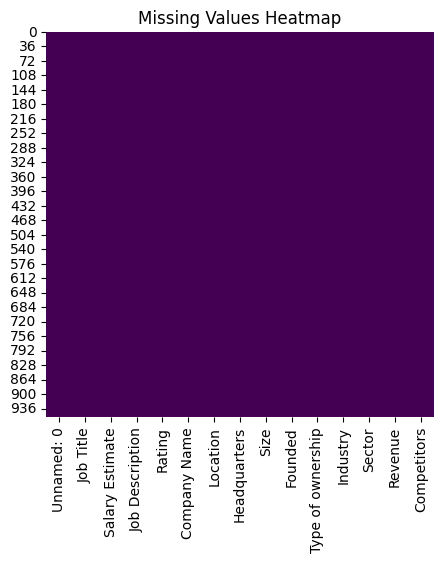

In [8]:
# Visualizing the missing values
plt.figure(figsize=(5, 5))
sns.heatmap(df_train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

Missing values after replacing '-1':
Unnamed: 0             0
Job Title              0
Salary Estimate      214
Job Description        0
Rating                34
Company Name           0
Location               0
Headquarters          11
Size                  11
Founded               97
Type of ownership     11
Industry              39
Sector                39
Revenue               11
Competitors          634
dtype: int64
Total Missing values:
1101


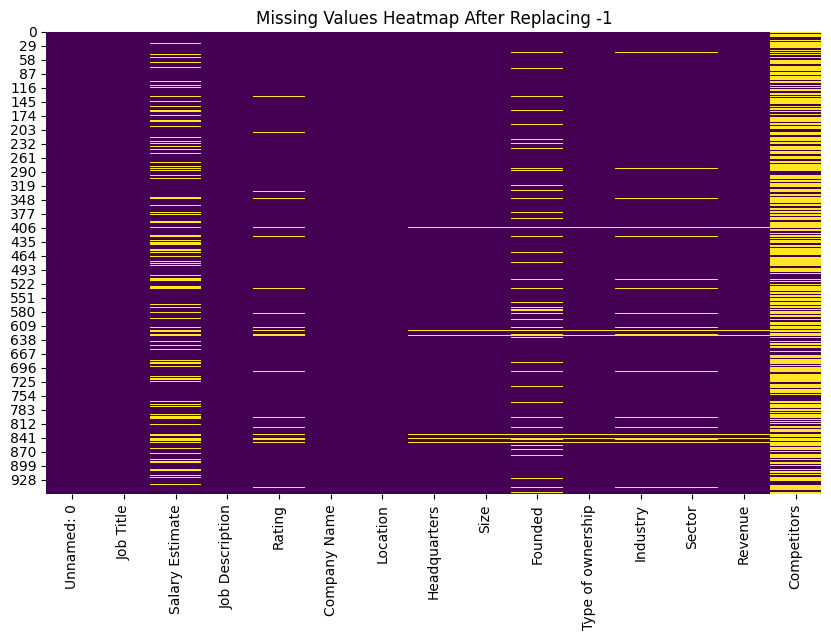

In [9]:
# Replace '-1' with NaN
df_train.replace(-1, np.nan, inplace=True)
df_train.replace('-1', np.nan, inplace=True) # Also replace '-1' in string format

# Check missing values after replacement
print("Missing values after replacing '-1':")
print(df_train.isnull().sum())

print("Total Missing values:")
print(df_train.isnull().sum().sum())
# Visualize missing values after replacement
plt.figure(figsize=(10, 6))
sns.heatmap(df_train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap After Replacing -1')
plt.show()

### What did you know about your dataset?

- There are `15` columns and `956` rows in the dataset.
- There appears to be no missing and duplicate values in the datset as per our analysis above but as we can manually see in the dataset the missing values are replaced by `-1` in the dataset so i will have to analyse it further to determine the actual number of missing values.
- After replacing `-1` by `Nan` we are able to see that there are `1101` total number of missing values.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df_train.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [11]:
# Dataset Describe
df_train.describe()

,Unnamed: 0,Rating,Founded
count,956.000000,922.000000,859.000000
mean,477.500000,3.770933,1975.110594
std,276.117729,0.609499,51.052540
min,0.000000,1.900000,1744.000000
25%,238.750000,3.400000,1965.000000
50%,477.500000,3.800000,1996.000000
75%,716.250000,4.200000,2008.000000
max,955.000000,5.000000,2019.000000


### Variables Description

-   Data Completeness:

    -   `Rating` has 34 missing values (3.6% of rows).

    -   `Founded` has 97 missing values (10.1% of rows).

-   Company Ratings:

    -   75% of companies have a rating ≥ 3.4 (above average).

    -   Only 25% achieve ≥ 4.2 (high ratings are less common).

-   Company Age:

    -   50% of companies were founded in 1996 or later (relatively young).

    -   A few are centuries old (oldest from 1744).

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
print(df_train.nunique()) #Number of uniques values in each column
for column in df_train.columns:
    unique_values = df_train[column].unique()[:10] #10 examples of unique values in each column
    print(f"Unique values for {column}: {unique_values}")

Unnamed: 0           956
Job Title            328
Salary Estimate      416
Job Description      596
Rating                31
Company Name         448
Location             237
Headquarters         234
Size                   8
Founded              108
Type of ownership     12
Industry              62
Sector                24
Revenue               13
Competitors          148
dtype: int64
Unique values for Unnamed: 0: [0 1 2 3 4 5 6 7 8 9]
Unique values for Job Title: ['Data Scientist' 'Healthcare Data Scientist' 'Research Scientist'
 'Staff Data Scientist - Technology' 'Data Analyst' 'Data Engineer I'
 'Scientist I/II, Biology' 'Customer Data Scientist'
 'Data Scientist - Health Data Analytics'
 'Senior Data Scientist / Machine Learning']
Unique values for Salary Estimate: ['$53K-$91K (Glassdoor est.)' '$63K-$112K (Glassdoor est.)'
 '$80K-$90K (Glassdoor est.)' '$56K-$97K (Glassdoor est.)'
 '$86K-$143K (Glassdoor est.)' '$71K-$119K (Glassdoor est.)'
 '$54K-$93K (Glassdoor est.)' '$86K-$14

## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Map 'Size' to 'Size_Group' with comprehensive mapping
size_mapping = {
    '-1': 'Unknown',
    '1 to 50 employees': '1-50',
    '51 to 200 employees': '51-200',
    '201 to 500 employees': '201-500',
    '501 to 1000 employees': '501-1000',
    '1001 to 5000 employees': '1001-5000',  # Added missing mapping
    '5001 to 10000 employees': '5001-10000',
    '10000+ employees': '10000+'
}
df_train['Size_Group'] = df_train['Size'].map(size_mapping).fillna('Unknown')

# Define ordered categories for Size_Group
ordered_size_categories = [
    '1-50', '51-200', '201-500', '501-1000',
    '1001-5000', '5001-10000', '10000+', 'Unknown'
]
df_train['Size_Group'] = pd.Categorical(
    df_train['Size_Group'],
    categories=ordered_size_categories,
    ordered=True
)

# Map 'Revenue' to 'Revenue_Group' with comprehensive handling
revenue_mapping = {
    '-1': 'Unknown',
    'Unknown / Non-Applicable': 'Unknown',
    'Less than $1 million (USD)': '<1M',
    '$1 to $5 million (USD)': '1-5M',
    '$5 to $10 million (USD)': '5-10M',
    '$10 to $25 million (USD)': '10-25M',
    '$25 to $50 million (USD)': '25-50M',
    '$50 to $100 million (USD)': '50-100M',
    '$100 to $500 million (USD)': '100-500M',
    '$500 million to $1 billion (USD)': '500M-1B',
    '$1 to $2 billion (USD)': '1-2B',
    '$2 to $5 billion (USD)': '2-5B',
    '$5 to $10 billion (USD)': '5-10B',
    '$10+ billion (USD)': '10B+'
}
df_train['Revenue_Group'] = df_train['Revenue'].map(revenue_mapping).fillna('Unknown')

# Define ordered categories for Revenue_Group
ordered_revenue_categories = [
    '<1M', '1-5M', '5-10M', '10-25M', '25-50M', '50-100M', '100-500M',
    '500M-1B', '1-2B', '2-5B', '5-10B', '10B+', 'Unknown'
]
df_train['Revenue_Group'] = pd.Categorical(
    df_train['Revenue_Group'],
    categories=ordered_revenue_categories,
    ordered=True
)

# Calculate company age with error handling
current_year = 2025
df_train['age'] = df_train['Founded'].apply(
    lambda x: current_year - x if pd.notnull(x) and x > 1800 else -1
)

# Handle 'Rating': Replace -1 with NaN
df_train['Rating'] = df_train['Rating'].replace(-1, np.nan)

# Drop unnamed column if exists
if 'Unnamed: 0' in df_train.columns:
    df_train.drop(columns=['Unnamed: 0'], inplace=True)

# Improved salary parsing function with hourly conversion
def parse_salary(salary_str):
    if not isinstance(salary_str, str):
        return np.nan, np.nan

    # Check hourly rate conversion
    is_hourly = 'per hour' in salary_str.lower()

    # Extract salary range
    range_part = salary_str.split('(')[0].strip()
    numbers = re.findall(r'(\d+(?:\.\d+)?)', range_part)

    if len(numbers) < 2:
        return np.nan, np.nan

    try:
        min_val = float(numbers[0])
        max_val = float(numbers[1])

        if is_hourly:
            # Convert hourly to annual (2080 hrs = 40hrs * 52wks)
            min_val *= 2080
            max_val *= 2080
        else:
            # Convert thousands to actual dollars
            min_val *= 1000
            max_val *= 1000

        return min_val, max_val
    except (ValueError, TypeError):
        return np.nan, np.nan

# Apply salary parsing
salary_data = df_train['Salary Estimate'].apply(lambda x: pd.Series(parse_salary(x)) if pd.notnull(x) else pd.Series([np.nan, np.nan]))
df_train[['min_salary', 'max_salary']] = salary_data
df_train['avg_salary'] = (df_train['min_salary'] + df_train['max_salary']) / 2

# Improved job title simplification
def simplify_title(title):
    if not isinstance(title, str):
        return 'na'

    title = title.lower()
    if 'data scientist' in title:
        return 'data scientist'
    elif 'data engineer' in title:
        return 'data engineer'
    elif 'analyst' in title:
        return 'analyst'
    elif 'machine learning' in title or 'ml engineer' in title:
        return 'mle'
    elif 'manager' in title:
        return 'manager'
    elif 'director' in title:
        return 'director'
    else:
        return 'na'

df_train['job_simp'] = df_train['Job Title'].apply(simplify_title)

# Extract job state with error handling
def extract_state(location):
    if not isinstance(location, str):
        return None
    parts = location.split(',')
    return parts[-1].strip() if len(parts) > 1 else None

df_train['job_state'] = df_train['Location'].apply(extract_state)

# Improved seniority detection
def detect_seniority(title):
    if not isinstance(title, str):
        return 'na'

    title = title.lower()
    if any(word in title for word in ['senior', 'sr', 'lead', 'principal', 'iii', 'iv', 'v']):
        return 'senior'
    elif any(word in title for word in ['junior', 'jr', 'entry', 'associate', 'i', 'ii']):
        return 'jr'
    else:
        return 'na'

df_train['seniority'] = df_train['Job Title'].apply(detect_seniority)

# Skill detection with case insensitivity
def detect_skill(description, skill):
    if not isinstance(description, str):
        return 0
    return 1 if skill.lower() in description.lower() else 0

df_train['python'] = df_train['Job Description'].apply(lambda x: detect_skill(x, 'python'))
df_train['R'] = df_train['Job Description'].apply(lambda x: detect_skill(x, 'r studio') or detect_skill(x, 'r-studio'))
df_train['spark'] = df_train['Job Description'].apply(lambda x: detect_skill(x, 'spark'))
df_train['aws'] = df_train['Job Description'].apply(lambda x: detect_skill(x, 'aws'))
df_train['excel'] = df_train['Job Description'].apply(lambda x: detect_skill(x, 'excel'))

# Competitor count with null handling
df_train['competitor_count'] = df_train['Competitors'].apply(lambda x: len(x.split(',')) if pd.notnull(x) and x != '-1' and isinstance(x, str) else 0)

# Description length
df_train['desc_len'] = df_train['Job Description'].apply(lambda x: len(x) if isinstance(x, str) else 0)

# Save cleaned data
df_train.to_csv('cleaned_data.csv', index=False)
print("Data cleaning and feature engineering complete!")
df_train.head()

Data cleaning and feature engineering complete!


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,job_simp,job_state,seniority,python,R,spark,aws,excel,competitor_count,desc_len
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973.0,Company - Private,...,data scientist,NM,jr,1,0,0,0,1,0,2536
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984.0,Other Organization,...,data scientist,MD,jr,1,0,0,0,0,0,4783
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010.0,Company - Private,...,data scientist,FL,jr,1,0,1,0,1,0,3461
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965.0,Government,...,data scientist,WA,jr,1,0,0,0,0,3,3883
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998.0,Company - Private,...,data scientist,NY,jr,1,0,0,0,1,3,2728


### What all manipulations have you done and insights you found?

## Summary:

### Data Analysis Key Findings

*   Missing values in the `Rating` column were imputed with the mean, and missing values in the `Founded` column were imputed with the median.
*   A new column, `Company Age`, was created by subtracting the `Founded` year from the current year (2025).
*   The distribution of `Company Age` is `positively` skewed (skewness $\approx$ 2.12), indicating a higher frequency of `younger companies` in the dataset.
* Dropped `unnamed` column which was just there to count the number of rows.

### Insights or Next Steps

*   Company age alone is `not` a strong predictor of company rating based on this dataset. Further analysis should include other factors that might influence ratings, such as industry, company size, or reviews.
*   Given the skewed distribution of company age, i will consider applying transformations or using non-parametric methods if company age is used as a feature in a predictive model for rating.


## ***4. Data Visualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

---
Univariate Charts

#### Chart - 1 - Histogram

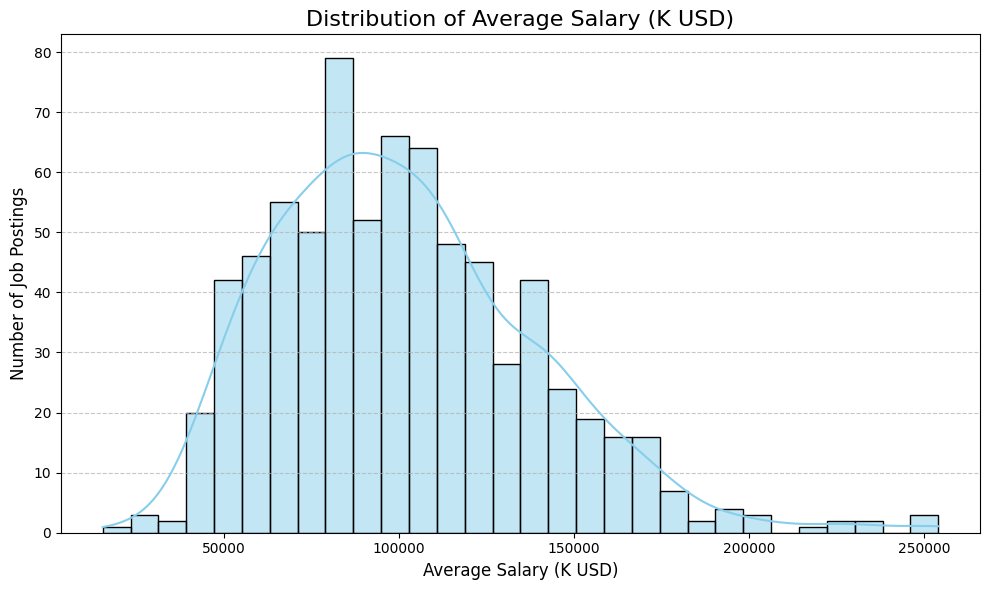

In [14]:
# Chart 1: Distribution of Average Salary
plt.figure(figsize=(10, 6))
sns.histplot(df_train['avg_salary'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Average Salary (K USD)', fontsize=16)
plt.xlabel('Average Salary (K USD)', fontsize=12)
plt.ylabel('Number of Job Postings', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A histogram was chosen to visualize the distribution of average salaries as it effectively shows the frequency of salary ranges, providing a clear overview of the salary landscape in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The distribution of average salaries appears to be `right-skewed`, indicating that the `majority of job postings` offer salaries in the `lower to middle range`, with fewer postings offering significantly higher salaries. There are some outliers with very high average salaries.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can create a positive business impact.
- For companies, understanding the salary distribution helps in setting competitive compensation packages to attract and retain talent.
- For job seekers, it provides realistic salary expectations. The presence of high-salary outliers might indicate specialized roles or companies, which could be a focus for targeted recruitment or job searching strategies.

#### Chart - 2 - Histogram

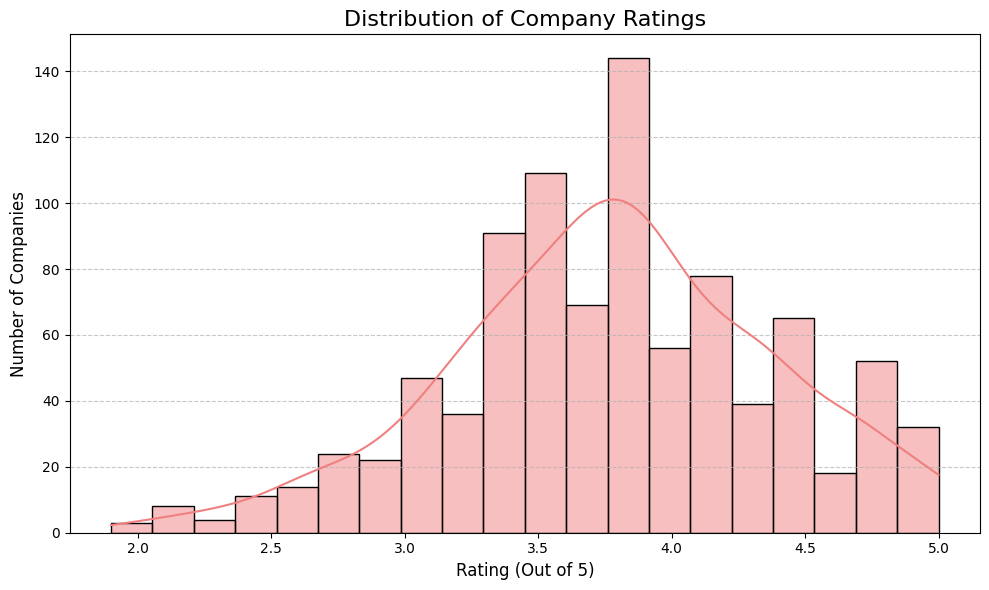

In [15]:
# Chart 2: Distribution of Company Rating
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Rating'].dropna(), kde=True, bins=20, color='lightcoral')
plt.title('Distribution of Company Ratings', fontsize=16)
plt.xlabel('Rating (Out of 5)', fontsize=12)
plt.ylabel('Number of Companies', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A histogram is suitable for visualizing the distribution of company ratings because it shows the frequency of different rating values, allowing us to understand the overall sentiment towards companies in the dataset.

##### 2. What is/are the insight(s) found from the chart?

- The distribution of company ratings is skewed towards higher ratings, with a peak around 3.5 to 4.0.
- This suggests that a `larger number of companies` in the dataset have `above-average ratings`.
- There is a tail extending to lower ratings, indicating some companies have poor ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can have a positive business impact.
- For companies, a skewed distribution towards higher ratings can be used as a positive marketing point to attract employees.
- For job seekers, it indicates that there are many well-regarded companies to consider.
- Companies with lower ratings can use this information to identify areas for improvement to enhance their reputation and attract better talent.

#### Chart - 3 - Bar Plot

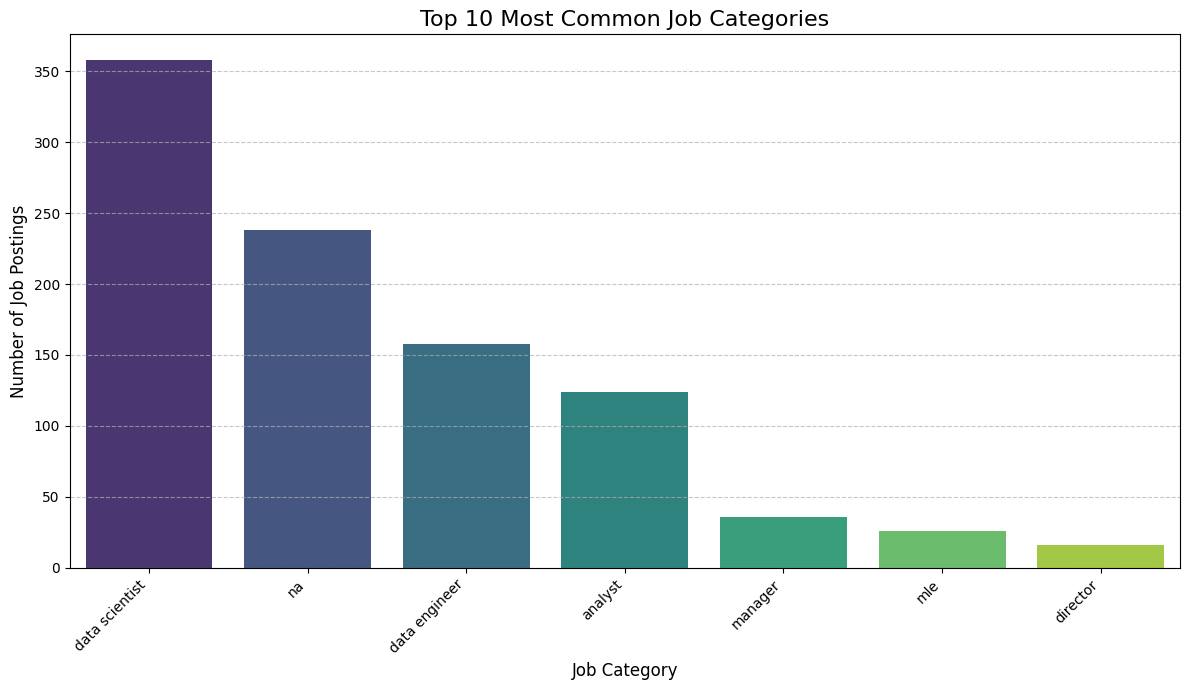

In [16]:
# Chart 3: Top 10 Job Simple Categories
plt.figure(figsize=(12, 7))
top_jobs = df_train['job_simp'].value_counts().nlargest(10)
sns.barplot(x=top_jobs.index, y=top_jobs.values, palette='viridis')
plt.title('Top 10 Most Common Job Categories', fontsize=16)
plt.xlabel('Job Category', fontsize=12)
plt.ylabel('Number of Job Postings', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot is effective for displaying the counts of different job categories, making it easy to compare the popularity or frequency of various roles in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The bar plot clearly shows that `data scientist` is the most frequent job category in the dataset, followed by `na` (which likely represents uncategorized jobs), `data engineer`, and `analyst`. Other categories like `manager`, `mle`, and `director` appear less frequently.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can create a positive business impact.
- For recruitment agencies and companies hiring, it highlights the most in-demand job roles, allowing them to focus their recruitment efforts.
- For individuals, it provides information on popular career paths in the data field.
- Identifying the less frequent categories might also reveal niche areas.

#### Chart - 4 - Bar Plot

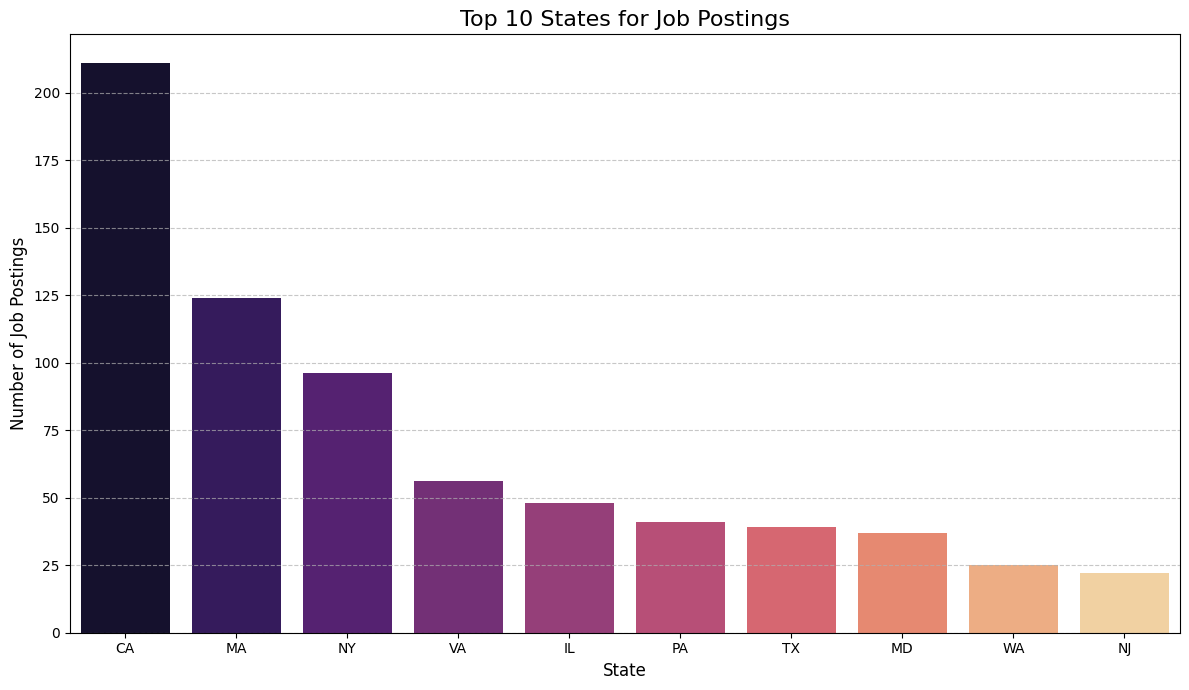

In [17]:
# Chart 4: Top 10 Job Locations
plt.figure(figsize=(12, 7))
top_locations = df_train['job_state'].value_counts().nlargest(10)
sns.barplot(x=top_locations.index, y=top_locations.values, palette='magma')
plt.title('Top 10 States for Job Postings', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Job Postings', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot is used to show the frequency of job postings by state, which helps in identifying the key geographical hubs for data-related jobs.

##### 2. What is/are the insight(s) found from the chart?

- The bar plot shows that `California` (CA) has the highest number of job postings, significantly more than other states.
- Following California are states like Massachusetts (MA) and New York (NY), indicating that these are major centers for data-related employment.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight has a positive business impact.
- For job seekers, it directs their search towards states with more opportunities.
- For companies, it helps in understanding where their talent pool is concentrated and informs decisions about establishing or expanding offices in certain locations.
- It can also highlight areas with less competition for talent if companies are willing to look beyond the top states.

#### Chart - 5 - Bar Plot

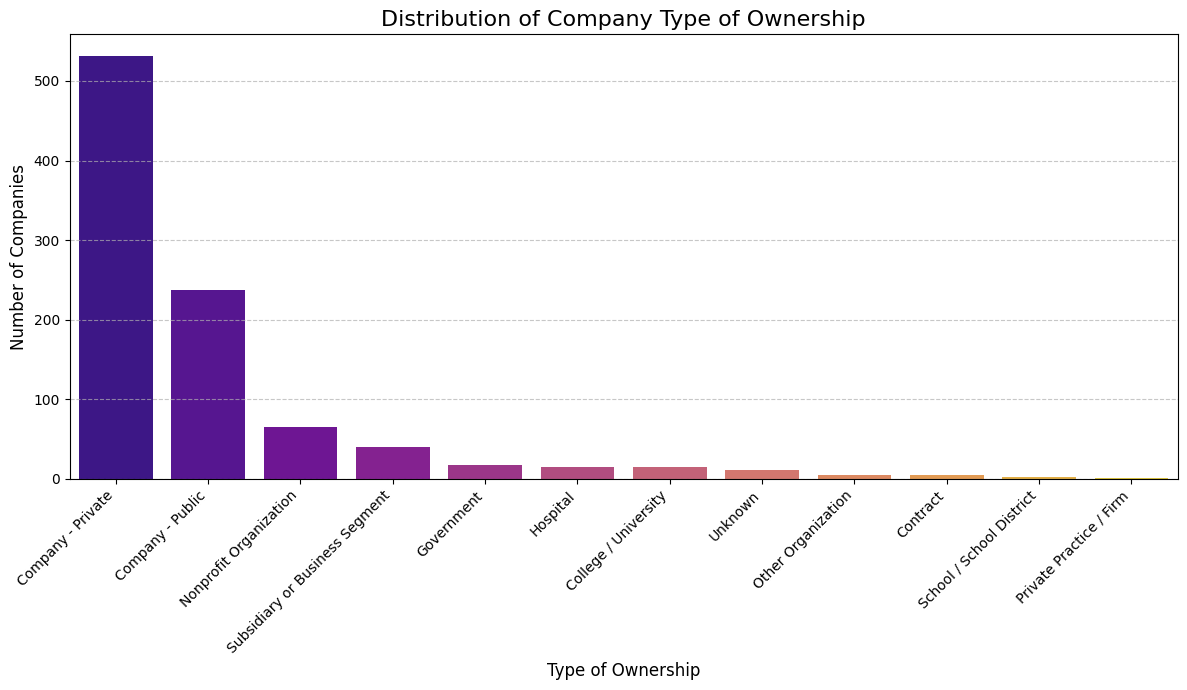

In [18]:
# Chart 5: Distribution of Type of Ownership
plt.figure(figsize=(12, 7))
ownership_counts = df_train['Type of ownership'].value_counts()
sns.barplot(x=ownership_counts.index, y=ownership_counts.values, palette='plasma')
plt.title('Distribution of Company Type of Ownership', fontsize=16)
plt.xlabel('Type of Ownership', fontsize=12)
plt.ylabel('Number of Companies', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A bar plot is suitable for visualizing the distribution of company ownership types, providing a clear view of the prevalence of different organizational structures in the dataset.

##### 2. What is/are the insight(s) found from the chart?

- The plot reveals that `Company - Private` is the most common type of ownership among the companies in the dataset, followed by `Company - Public`.
- Other types like 'Nonprofit Organization', 'Subsidiary or Business Segment', and 'Government' are less frequent.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can be useful.
- For job seekers, understanding the dominant ownership types can inform their career choices, as different ownership structures may have different cultures, compensation structures, and growth trajectories.
- For companies, it provides a benchmark of the competitive landscape in terms of organizational structure.

#### Chart - 6 - Histogram

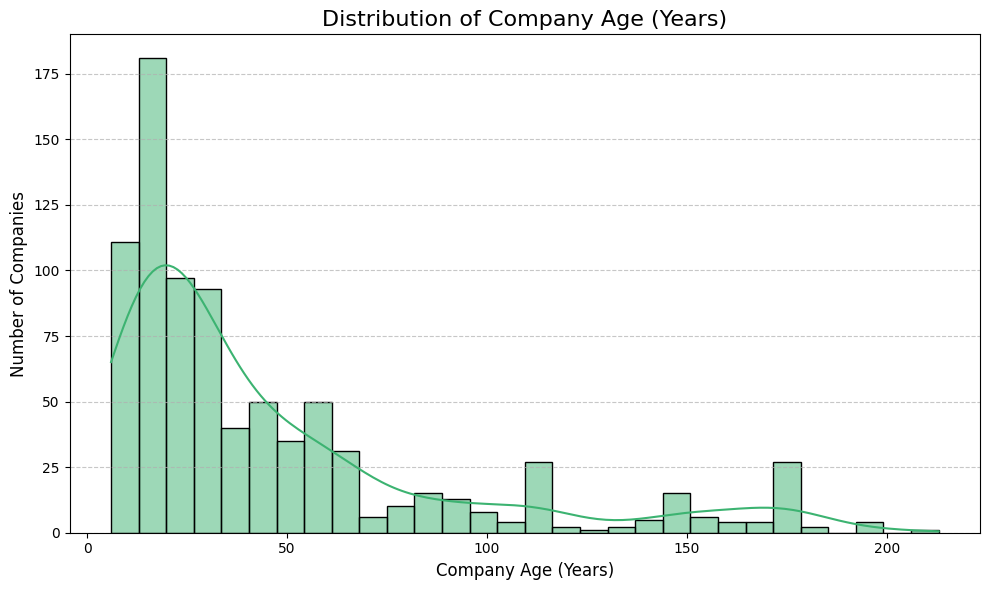

In [19]:
# Chart 6: Distribution of Company Age
# Filter out unknown ages (-1) for clearer visualization
plt.figure(figsize=(10, 6))
sns.histplot(df_train[df_train['age'] != -1]['age'], kde=True, bins=30, color='mediumseagreen')
plt.title('Distribution of Company Age (Years)', fontsize=16)
plt.xlabel('Company Age (Years)', fontsize=12)
plt.ylabel('Number of Companies', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is used to visualize the distribution of company age, which helps in understanding the age profile of companies in the dataset. Filtering out unknown ages provides a clearer picture of the known data.

##### 2. What is/are the insight(s) found from the chart?

- The distribution of company age is `right-skewed`, indicating a `higher` number of younger companies in the dataset and `fewer` very old companies.
- There is a `long tail` extending towards older ages, suggesting the presence of some well-established, long-standing companies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can have a positive business impact.
- For job seekers, it suggests that there are many opportunities in newer, potentially fast-growing companies.
- For investors and business strategists, understanding the age distribution can provide context about the maturity of the industry represented in the dataset.



---

Bivariate Charts


#### Chart - 7 - Box Plot

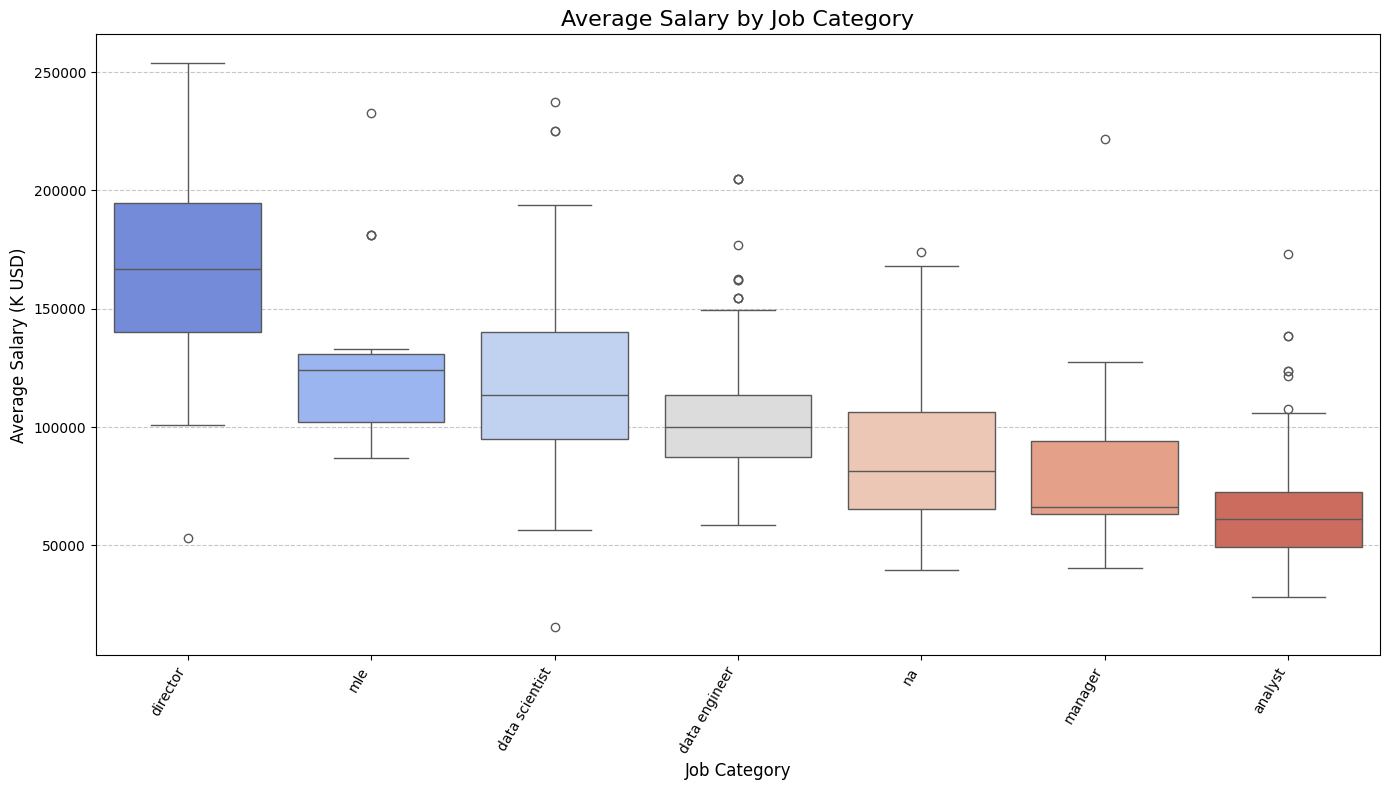

In [20]:
# Chart 7: Average Salary by Simplified Job Category
plt.figure(figsize=(14, 8))
# Order categories by median salary for better readability
ordered_job_simp = df_train.groupby('job_simp')['avg_salary'].median().sort_values(ascending=False).index
sns.boxplot(x='job_simp', y='avg_salary', data=df_train, order=ordered_job_simp, palette='coolwarm')
plt.title('Average Salary by Job Category', fontsize=16)
plt.xlabel('Job Category', fontsize=12)
plt.ylabel('Average Salary (K USD)', fontsize=12)
plt.xticks(rotation=60, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A box plot is an excellent choice to compare the distribution of average salaries across different job categories. It effectively shows the median, quartiles, and potential outliers for each category.

##### 2. What is/are the insight(s) found from the chart?

- The box plot clearly shows that some job categories, such as `mle` (Machine Learning Engineer) and `data scientist`, tend to have `higher` median average `salaries` compared to others like 'analyst'.
- The spread of salaries also varies by category, with some having wider ranges (indicating more variability) than others.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight has a strong positive business impact.
- For individuals, it provides valuable information for career planning and salary negotiation.
- For companies, it helps in setting appropriate salary benchmarks for different roles to remain competitive in the talent market.
- Understanding salary variations can also inform decisions about investing in specific roles or training programs.

#### Chart - 8 - Box Plot

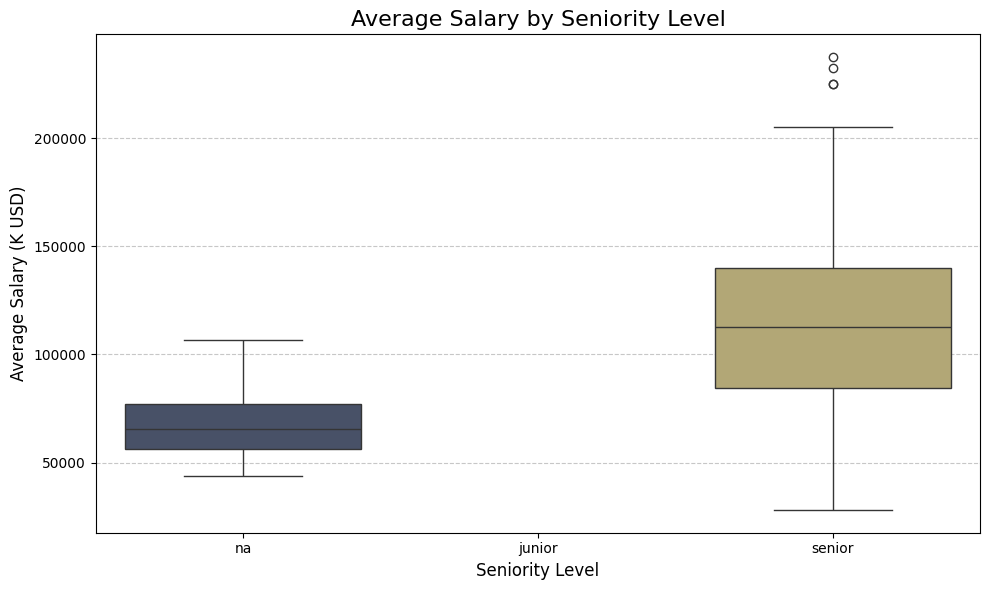

In [21]:
# Chart 8: Average Salary by Seniority Level
plt.figure(figsize=(10, 6))
# Define a specific order for seniority for better representation
seniority_order = ['na', 'junior', 'senior'] # Assuming 'na' means no specific seniority, often entry-level or generic
sns.boxplot(x='seniority', y='avg_salary', data=df_train, order=seniority_order, palette='cividis')
plt.title('Average Salary by Seniority Level', fontsize=16)
plt.xlabel('Seniority Level', fontsize=12)
plt.ylabel('Average Salary (K USD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A box plot is an excellent choice to compare the distribution of average salaries between seniority levels. It effectively shows the na (entry, fresher, management level), junior, and senior average salary and range.

##### 2. What is/are the insight(s) found from the chart?

- The box plot demonstrates a clear trend: as `seniority` increases, the `average salary` also tends to `increase`.
- `Senior` roles have a significantly `higher median salary` and a wider salary range compared to 'jr' (junior) and 'na' (not specified) roles.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight is highly impactful for business.
- It validates the industry standard of higher compensation for more experienced roles.
- For companies, it's crucial for structuring career progression paths and compensation bands.
- For individuals, it emphasizes the financial benefit of gaining experience and moving into senior roles.

#### Chart - 9 - Bar Plot

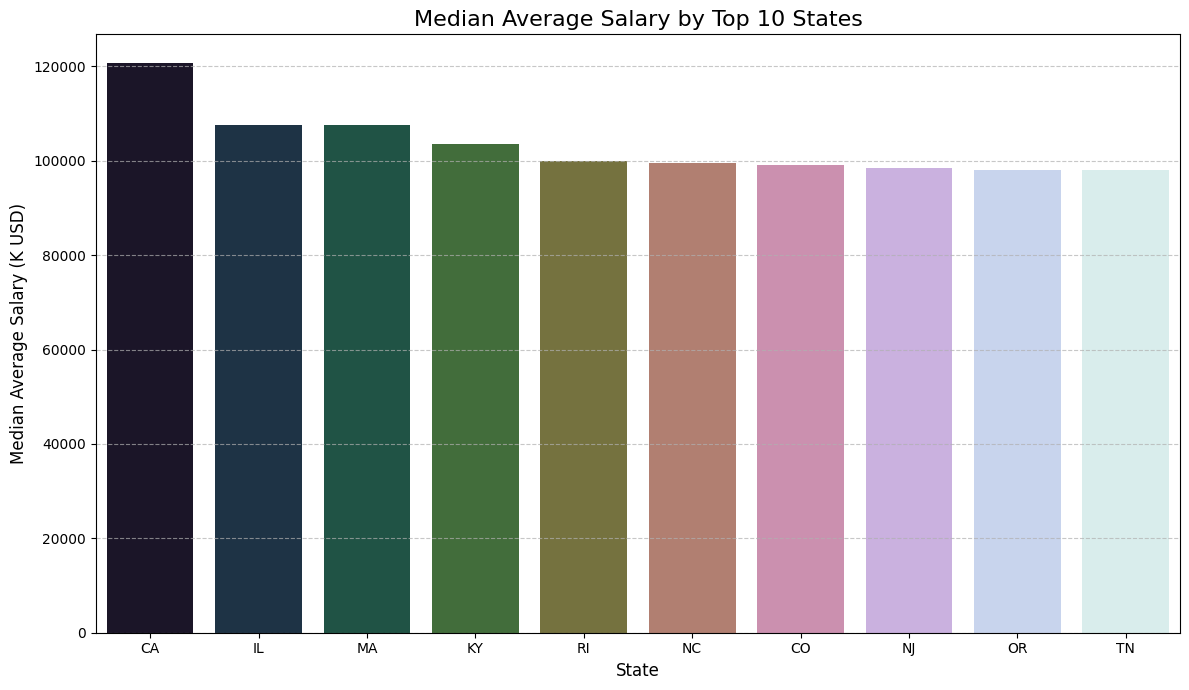

In [22]:
# Chart 9: Average Salary by Top 10 States
plt.figure(figsize=(12, 7))
# Calculate median salary per state for top 10 states
median_salary_by_state = df_train.groupby('job_state')['avg_salary'].median().nlargest(10).sort_values(ascending=False)
sns.barplot(x=median_salary_by_state.index, y=median_salary_by_state.values, palette='cubehelix')
plt.title('Median Average Salary by Top 10 States', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Median Average Salary (K USD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot is used to show the median average salary for the top 10 states with the most job postings. The median is a good measure here as it is less sensitive to extreme outliers compared to the mean.

##### 2. What is/are the insight(s) found from the chart?

- The bar plot shows that there is variation in median average salaries across the top states.
- `California` (CA) appears to have one of the highest median salaries, which aligns with having the most job postings.
- Other states like Illinois (IL) and Massachusetts (MA) also show relatively high median salaries.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight has a positive business impact.
- For job seekers, it helps in deciding which locations might offer higher earning potential.
- For companies, it is essential for understanding regional salary differences and adjusting compensation strategies based on location to attract talent effectively.
- It can also inform decisions about remote work policies.


#### Chart - 10 - Bar Plot

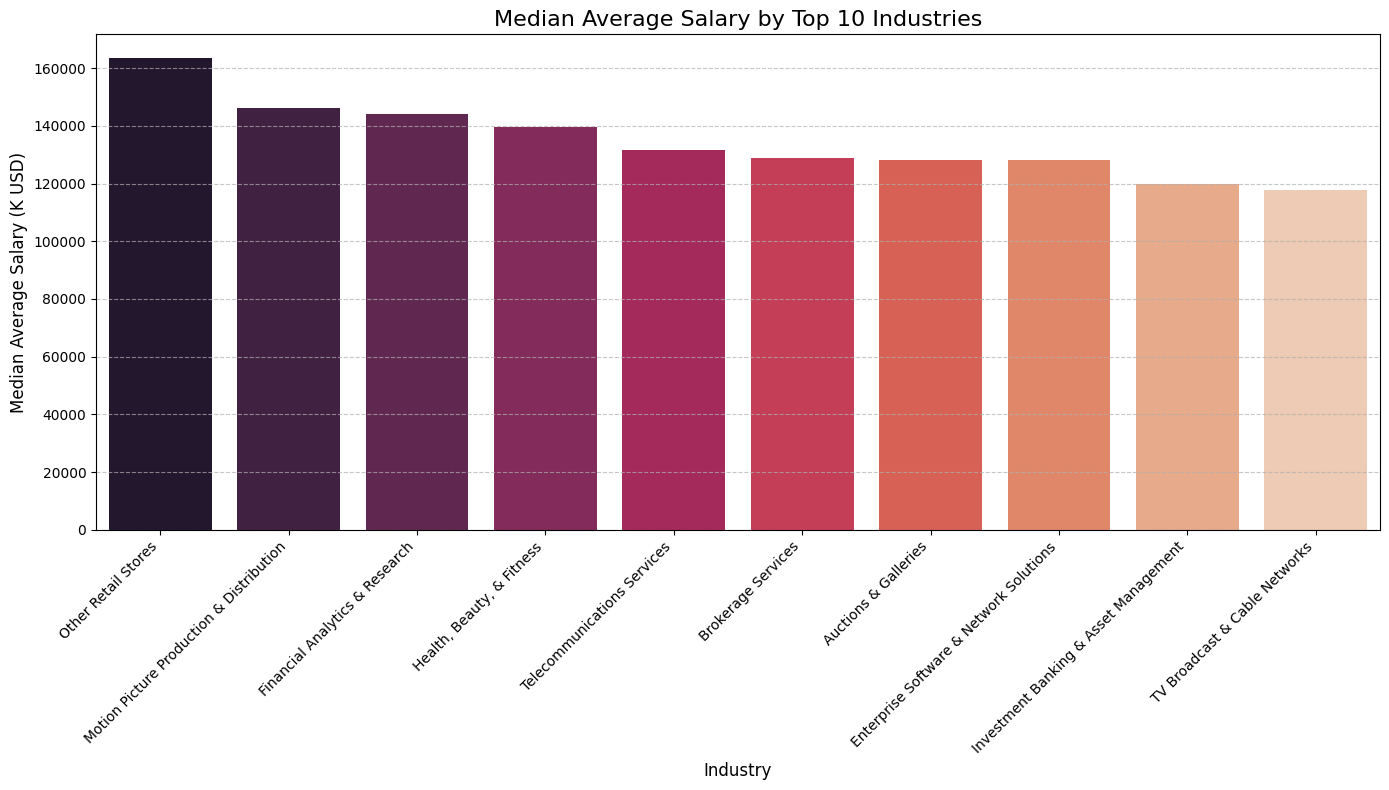

In [23]:
# Chart 10: Average Salary by Top 10 Industries
plt.figure(figsize=(14, 8))
# Calculate median salary per industry for top 10 industries
median_salary_by_industry = df_train.groupby('Industry')['avg_salary'].median().nlargest(10).sort_values(ascending=False)
sns.barplot(x=median_salary_by_industry.index, y=median_salary_by_industry.values, palette='rocket')
plt.title('Median Average Salary by Top 10 Industries', fontsize=16)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Median Average Salary (K USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot is used to visualize the median average salary for the top 10 industries. This helps in identifying which industries are most lucrative for data professionals.

##### 2. What is/are the insight(s) found from the chart?

- The bar plot shows significant variation in median average salaries across different industries.
- Industries like `Other Retail Stores`, `Motion Picture Production & Distribution`, and `Financial Analytics & Research` appear to have higher median salaries among the top 10 industries.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight is valuable for both individuals and businesses.
- For individuals, it helps in identifying industries with higher earning potential.
- For companies, it provides an understanding of the compensation landscape within their industry and in competing industries, which is crucial for attracting and retaining talent.
- It can also inform strategic decisions about focusing on specific industries.

#### Chart - 11 - Box Plot

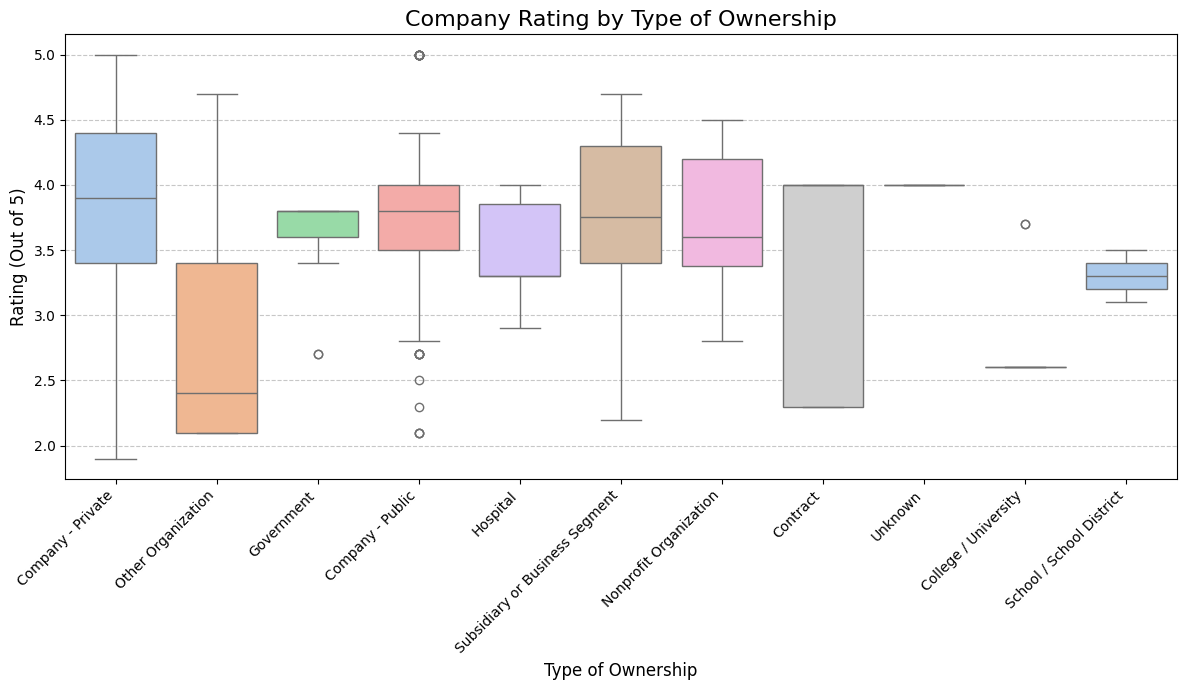

In [24]:
# Chart 11: Company Rating by Type of Ownership
plt.figure(figsize=(12, 7))
# Drop NaN ratings before plotting
sns.boxplot(x='Type of ownership', y='Rating', data=df_train.dropna(subset=['Rating']), palette='pastel')
plt.title('Company Rating by Type of Ownership', fontsize=16)
plt.xlabel('Type of Ownership', fontsize=12)
plt.ylabel('Rating (Out of 5)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A box plot is suitable for comparing the distribution of company ratings across different types of ownership. It allows for a visual comparison of the range and median rating for each ownership type.

##### 2. What is/are the insight(s) found from the chart?

- The box plot shows some variation in company ratings based on ownership type.
- While most types have a median rating around 3.5-4.0, some like `Subsidiary or Business Segment` and `Company - Public` show a slightly wider spread or potentially lower median compared to `Company - Private`.
- `Government` and `Nonprofit Organization` also show distinct distributions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can have a positive business impact.
- For job seekers, it provides an idea of the typical employee satisfaction levels associated with different types of organizations.
- For companies, it can serve as a benchmark to see how their employee satisfaction (as reflected in ratings) compares to others with similar ownership structures and potentially identify best practices from highly-rated types.

#### Chart - 12 - Regression Plot

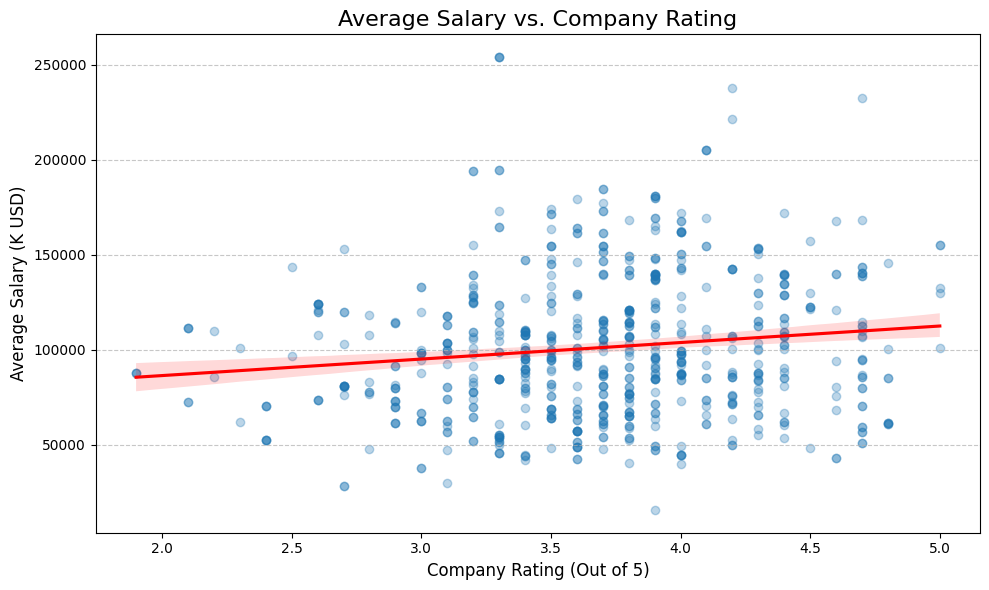

In [25]:
# Chart 12: Relationship between Average Salary and Company Rating
plt.figure(figsize=(10, 6))
sns.regplot(x='Rating', y='avg_salary', data=df_train.dropna(subset=['Rating']), scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Average Salary vs. Company Rating', fontsize=16)
plt.xlabel('Company Rating (Out of 5)', fontsize=12)
plt.ylabel('Average Salary (K USD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A regression plot is used to visualize the relationship between average salary and company rating. It includes a scatter plot of the data points and a regression line to show the overall trend.

##### 2. What is/are the insight(s) found from the chart?

- The regression plot suggests a `slight positive correlation` between `company rating and average salary`.
- While there is a wide spread of data points, the regression line shows a `general upward trend`, indicating that jobs at `higher-rated companies` tend to have `slightly higher` average salaries. However, the correlation is not very strong.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Yes, this insight has a positive business impact, although the impact might be moderate due to the weak correlation.
- For job seekers, it suggests that considering company ratings might be a factor, but salary is influenced by many other variables.
- For companies, it hints that improving company culture and employee satisfaction (reflected in ratings) might also have a positive, albeit small, impact on the ability to offer competitive salaries or attract talent.

#### Chart - 13 - Box Plot

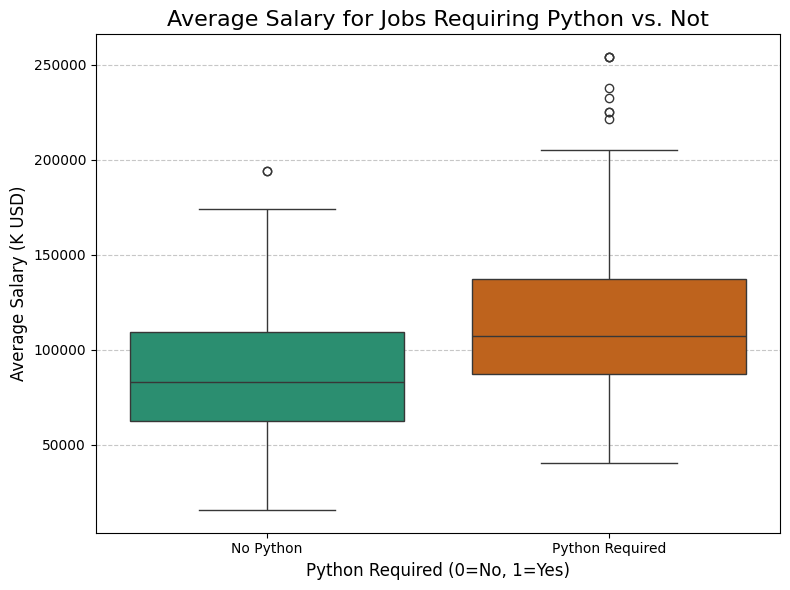

In [26]:
# Chart 13: Impact of Python Skill on Average Salary
plt.figure(figsize=(8, 6))
sns.boxplot(x='python', y='avg_salary', data=df_train, palette='Dark2')
plt.title('Average Salary for Jobs Requiring Python vs. Not', fontsize=16)
plt.xlabel('Python Required (0=No, 1=Yes)', fontsize=12)
plt.ylabel('Average Salary (K USD)', fontsize=12)
plt.xticks([0, 1], ['No Python', 'Python Required'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A box plot is used to compare the distribution of average salaries for job postings that require Python versus those that do not. This helps in understanding the value placed on this specific skill in the job market.

##### 2. What is/are the insight(s) found from the chart?

- The box plot clearly shows that jobs requiring `Python` tend to have a `higher median average salary`compared to jobs that do not require Python.
- The salary range for `Python-required jobs` also appears to be `generally higher`.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight has a significant positive business impact.
- For individuals, it highlights the value of acquiring and demonstrating `Python skills` to command `higher salaries`.
- For companies, it confirms the demand for `Python proficiency` and can inform training programs or recruitment strategies to `attract` candidates with this skill.
- It also suggests that jobs requiring Python are often associated with `higher-paying roles` (e.g., data scientist, data engineer).

---
Multivariate Charts

#### Chart - 14 - Correlation Heatmap

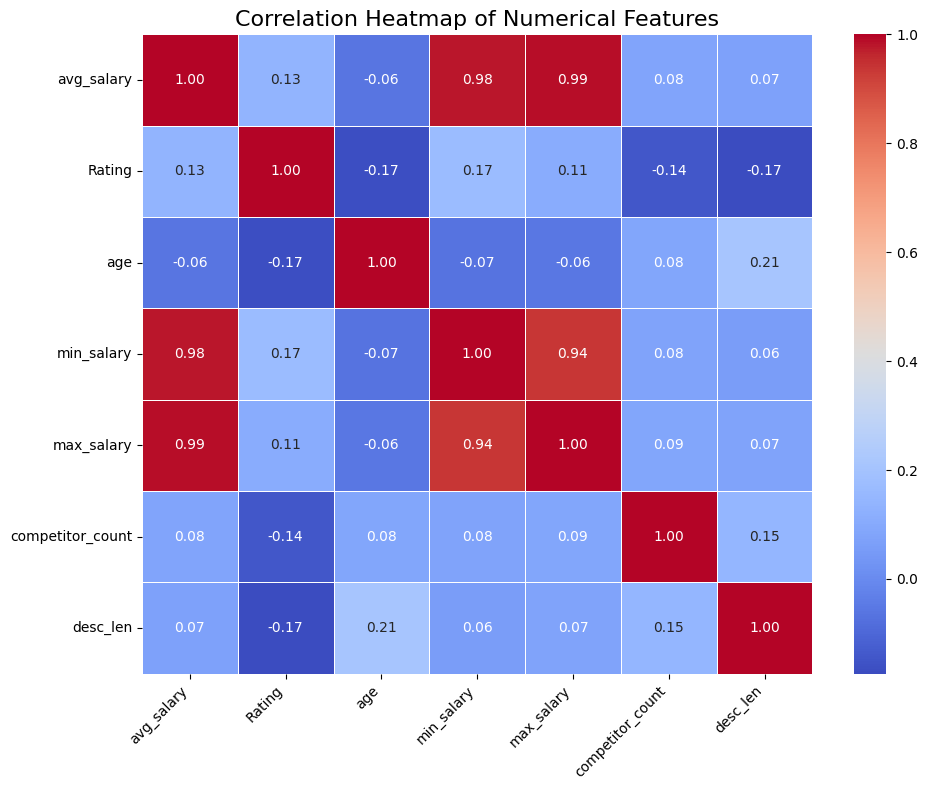

In [27]:
# Chart 16: Correlation Heatmap of Numerical Features
plt.figure(figsize=(10, 8))
numerical_features = ['avg_salary', 'Rating', 'age', 'min_salary', 'max_salary', 'competitor_count', 'desc_len']
correlation_matrix = df_train[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

- A correlation heatmap is used to visualize the pairwise correlations between numerical features in the dataset. This helps in identifying which numerical variables are strongly related to each other.

##### 2. What is/are the insight(s) found from the chart?

- The heatmap shows the correlation coefficients between the selected numerical features. Notably, 'avg_salary', 'min_salary', and 'max_salary' are highly positively correlated with each other, which is expected. 'Rating' shows a weak positive correlation with 'avg_salary'.
- 'Company Age' has weak correlations with other variables.
- 'Competitor Count' and 'Description Length' also show weak correlations with salary and rating.

#### Chart - 15 - Grouped Box Plot

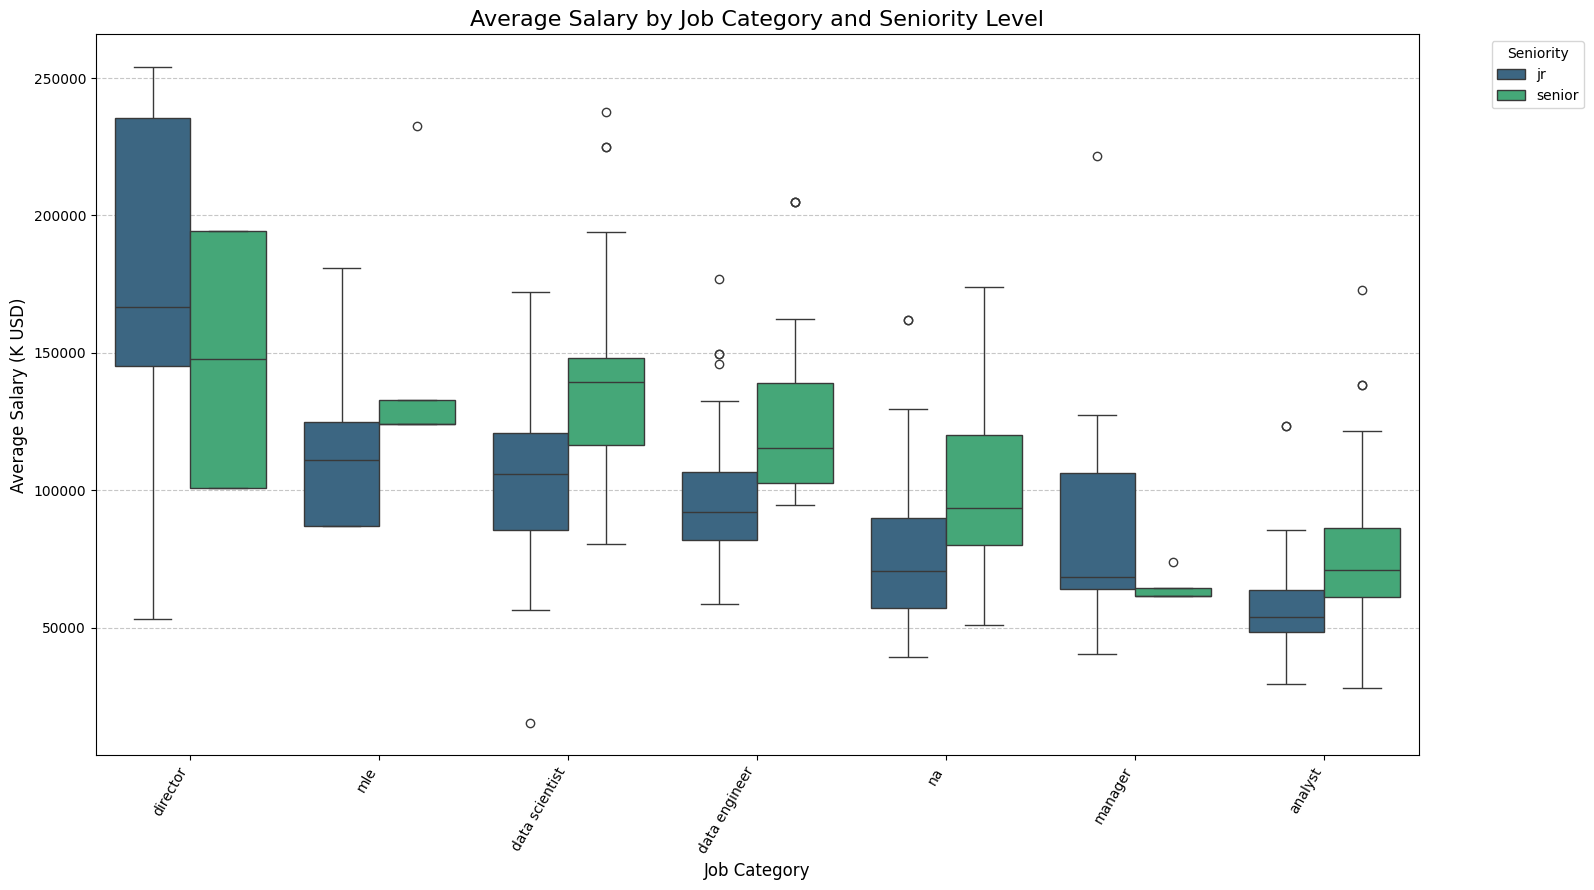

In [28]:
# Chart 15: Average Salary by Job Category and Seniority
plt.figure(figsize=(16, 9))
# Filter out 'na' seniority for cleaner comparison if 'na' is not a specific level
plot_df_train_seniority = df_train[df_train['seniority'] != 'na'].copy()
# Order job_simp by overall median salary for better structure
ordered_job_simp_multi = plot_df_train_seniority.groupby('job_simp')['avg_salary'].median().sort_values(ascending=False).index

sns.boxplot(x='job_simp', y='avg_salary', hue='seniority', data=plot_df_train_seniority,
            order=ordered_job_simp_multi, palette='viridis')
plt.title('Average Salary by Job Category and Seniority Level', fontsize=16)
plt.xlabel('Job Category', fontsize=12)
plt.ylabel('Average Salary (K USD)', fontsize=12)
plt.xticks(rotation=60, ha='right')
plt.legend(title='Seniority', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

- It effectively compares the distribution of a `salary` across `multiple job category and seniority level`. Unlike a bar chart that only shows means, box plots provide a rich summary of the data's spread, central tendency, and skewness.

##### 2. What is/are the insight(s) found from the chart?

- For most job categories (e.g., `data scientist`, `data engineer`,` analyst`), `senior roles` generally command a `higher median salary` and often a higher overall salary range compared to junior roles.

- `Directors` (both junior and senior) appear to be the `highest-paid `roles, with median salaries well over $150,000.

- `Analysts` (both junior and senior) consistently have the `lowest salaries` among the categories shown, with median salaries generally below $70,000.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement 1: The average salary for data science roles is significantly higher than for data analyst roles.
### Hypothetical Statement 2: Companies with higher ratings offer higher average salaries.
### Hypothetical Statement 3: Requiring Python as a skill in job descriptions leads to a higher average salary.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): The average salary for data science roles is equal to or less than the average salary for data analyst roles.

Alternative Hypothesis (H₁): The average salary for data science roles is significantly higher than the average salary for data analyst roles.

#### 2. Perform an appropriate statistical test.

In [29]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# Filter data for Data Scientists and Data Analysts
data_scientists_salary = df_train[df_train['job_simp'] == 'data scientist']['avg_salary'].dropna()
data_analysts_salary = df_train[df_train['job_simp'] == 'analyst']['avg_salary'].dropna()

# Perform independent samples t-test
ttest_result = ttest_ind(data_scientists_salary, data_analysts_salary, alternative='greater')

print(f"T-test statistic: {ttest_result.statistic:.4f}")
print(f"P-value: {ttest_result.pvalue:.4f}")

T-test statistic: 14.9010
P-value: 0.0000


##### Which statistical test have you done to obtain P-Value?

An independent samples `t-test` was used to obtain the P-value.

##### Why did you choose the specific statistical test?

The independent samples t-test is appropriate because we are comparing the means of a continuous variable (average salary) between two independent groups (Data Scientists and Data Analysts). The goal is to determine if the difference in means between these two groups is statistically significant.


### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): Companies with higher ratings do not offer significantly higher average salaries than companies with lower ratings. (The correlation between rating and average salary is zero or negative).

Alternative Hypothesis (H₁): Companies with higher ratings offer significantly higher average salaries than companies with lower ratings. (The correlation between rating and average salary is positive).

#### 2. Perform an appropriate statistical test.

In [30]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr

# Drop rows with missing values in 'Rating' or 'avg_salary'
df_cleaned = df_train.dropna(subset=['Rating', 'avg_salary'])

# Perform Pearson correlation test
correlation_coef, p_value = pearsonr(df_cleaned['Rating'], df_cleaned['avg_salary'])

print(f"Pearson correlation coefficient: {correlation_coef:.4f}")
print(f"P-value: {p_value:.4f}")

Pearson correlation coefficient: 0.1336
P-value: 0.0003


##### Which statistical test have you done to obtain P-Value?

A `Pearson correlation test` was used to obtain the P-value.

##### Why did you choose the specific statistical test?

The Pearson correlation test is appropriate because we are examining the linear relationship between two continuous variables: Company Rating and Average Salary. The test determines if there is a statistically significant linear association between these two variables.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): Requiring Python as a skill in job descriptions does not lead to a significantly higher average salary compared to not requiring Python. (The average salary for jobs requiring Python is equal to or less than the average salary for jobs not requiring Python).

Alternative Hypothesis (H₁): Requiring Python as a skill in job descriptions leads to a significantly higher average salary compared to not requiring Python. (The average salary for jobs requiring Python is significantly higher than the average salary for jobs not requiring Python).

#### 2. Perform an appropriate statistical test.

In [31]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# Filter data for jobs requiring Python and not requiring Python
jobs_requiring_python = df_train[df_train['python'] == 1]['avg_salary'].dropna()
jobs_not_requiring_python = df_train[df_train['python'] == 0]['avg_salary'].dropna()

# Perform independent samples t-test
ttest_result = ttest_ind(jobs_requiring_python, jobs_not_requiring_python, alternative='greater')

print(f"T-test statistic: {ttest_result.statistic:.4f}")
print(f"P-value: {ttest_result.pvalue:.4f}")



T-test statistic: 9.0380
P-value: 0.0000


##### Which statistical test have you done to obtain P-Value?

An independent samples t-test was used to obtain the P-value.

##### Why did you choose the specific statistical test?

The independent samples t-test is appropriate because we are comparing the means of a continuous variable (average salary) between two independent groups (Jobs requiring python skills and Jobs not requiring python skills). The goal is to determine if the difference in means between these two groups is statistically significant.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [32]:
# Handling Missing Values & Missing Value Imputation
# Missing values were handled in the data wrangling code by replacing -1 with NaN
# and then handling these NaNs appropriately for different columns (e.g., dropping for Rating
# in visualizations, allowing them for founded age calculation).

# Re-checking missing values after initial handling in data wrangling
print("Missing values after initial handling:")
print(df_train.isnull().sum())

# We can consider imputation strategies for 'Founded' and 'Rating' if needed for modeling.
# For 'Founded', median imputation could be considered.
# For 'Rating', mean or median imputation could be considered, or using a model that handles NaNs.
# Given the relatively small percentage of missing values in 'Rating' (34 out of 956)
# and 'Founded' (97 out of 956), imputation might be reasonable depending on the model used.

# Example of median imputation for 'Founded' if required for a model that doesn't handle NaNs:
# df_train['Founded'].fillna(df_train['Founded'].median(), inplace=True)

# Example of mean imputation for 'Rating' if required:
# df_train['Rating'].fillna(df_train['Rating'].mean(), inplace=True)

# For now, we will proceed without imputation, assuming models that can handle NaNs or
# addressing it during model preparation if needed.

Missing values after initial handling:
Job Title              0
Salary Estimate      214
Job Description        0
Rating                34
Company Name           0
Location               0
Headquarters          11
Size                  11
Founded               97
Type of ownership     11
Industry              39
Sector                39
Revenue               11
Competitors          634
Size_Group             0
Revenue_Group          0
age                    0
min_salary           214
max_salary           214
avg_salary           214
job_simp               0
job_state             10
seniority              0
python                 0
R                      0
spark                  0
aws                    0
excel                  0
competitor_count       0
desc_len               0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

- Size: Mapped '-1' to 'Unknown', filled NaN with 'Unknown'

- Revenue: Mapped '-1' and 'Unknown / Non-Applicable' to 'Unknown', filled NaN

- Rating: Replaced -1 with NaN

- Founded: Set invalid years to -1

- Salary: Returned NaN for unparseable values

- Text features: Used placeholders ('na', None, 0) for missing values

- All of these imputations are done because ML models can smoothly handle `NaN` values in place of missing values as it is the standard

### 2. Handling Outliers

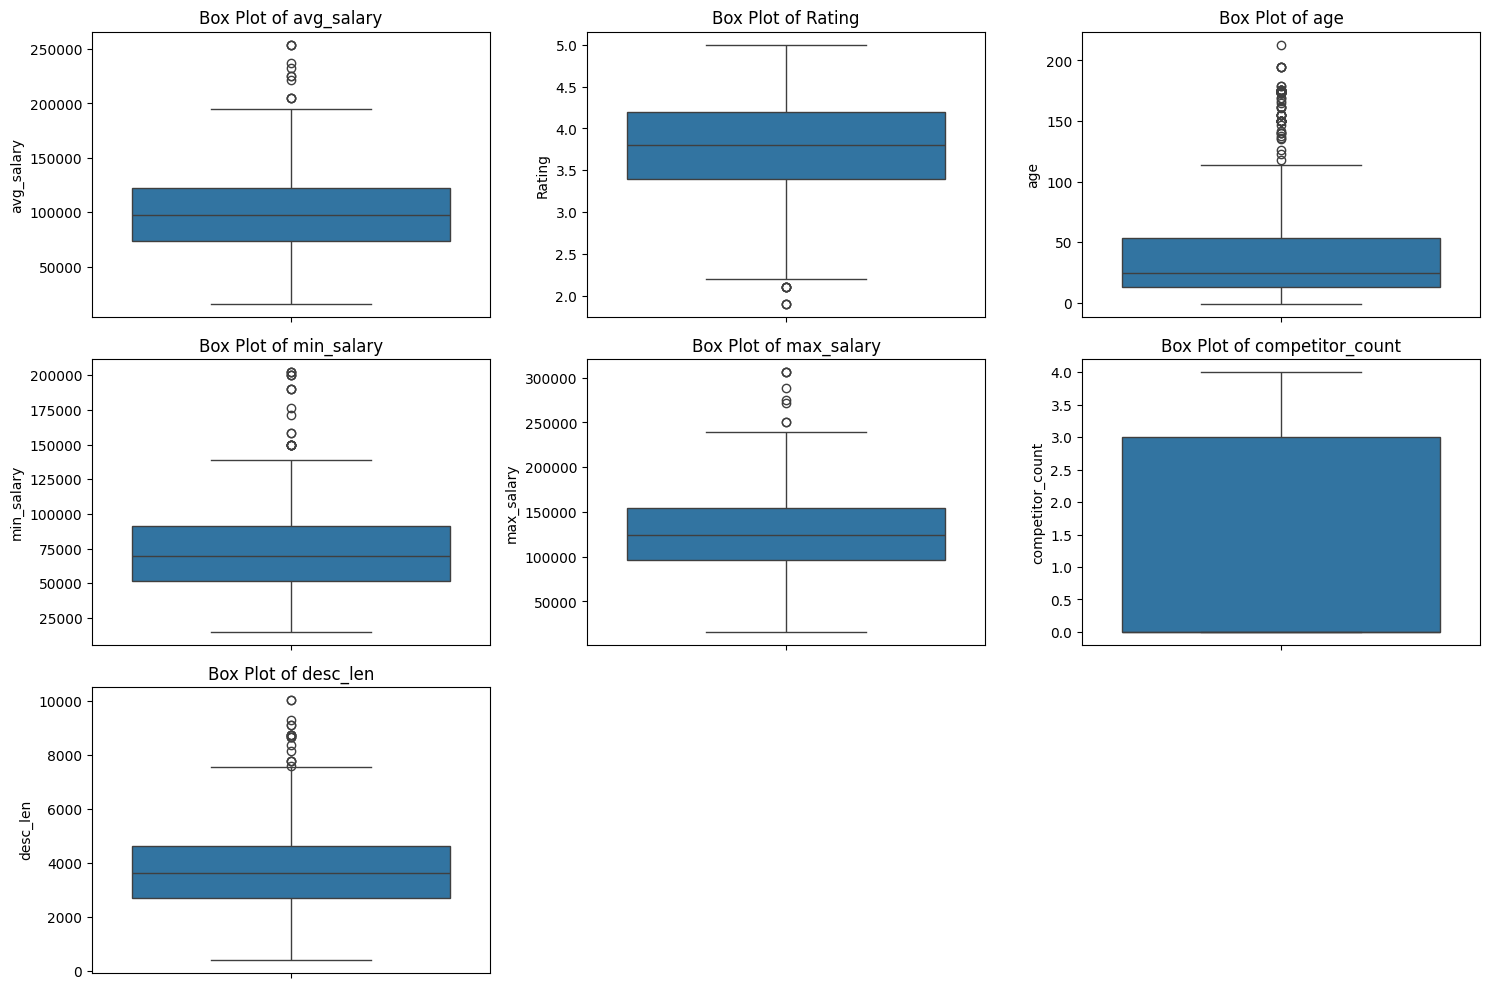

In [33]:
# Handling Outliers & Outlier treatments

# Visualizing potential outliers in numerical features using box plots
numerical_cols = ['avg_salary', 'Rating', 'age', 'min_salary', 'max_salary', 'competitor_count', 'desc_len']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df_train[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

# Outlier treatment can be done in several ways depending on the specific feature and model:
# 1. Removal: Remove rows with extreme outlier values. This should be used cautiously as it reduces data.
# 2. Transformation: Apply transformations like log or square root to reduce the impact of extreme values (e.g., for skewed distributions like 'avg_salary').
# 3. Capping: Cap outlier values at a certain percentile (e.g., 95th or 99th percentile).
# 4. Using models robust to outliers: Some models like tree-based models are less sensitive to outliers.

# For 'avg_salary', which shows significant outliers, we might consider capping or transformation
# if using linear models. For tree-based models, it might be less critical.

# Example of capping 'avg_salary' at the 99th percentile:
# q99 = df_train['avg_salary'].quantile(0.99)
# df_train['avg_salary_capped'] = df_train['avg_salary'].clip(upper=q99)

# For now, we will proceed without explicit outlier treatment in the main DataFrame,
# but note that this should be considered during the model building phase depending
# on the chosen algorithm.

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [34]:
# Encode your categorical columns
# Select categorical columns to encode
categorical_cols = df_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Exclude columns that were already handled or are not needed for encoding
cols_to_exclude = ['Job Title', 'Salary Estimate', 'Job Description', 'Company Name',
                   'Location', 'Headquarters', 'Size', 'Revenue', 'Competitors', 'job_state']
categorical_cols_to_encode = [col for col in categorical_cols if col not in cols_to_exclude]

# Use one-hot encoding for the remaining categorical columns
encoded_df = pd.get_dummies(df_train, columns=categorical_cols_to_encode, dummy_na=False)

# Display the first few rows of the encoded dataframe and its shape
print("Encoded DataFrame head:")
display(encoded_df.head())
print("\nShape of the encoded DataFrame:", encoded_df.shape)

Encoded DataFrame head:


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Revenue,...,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na,seniority_jr,seniority_na,seniority_senior
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973.0,$50 to $100 million (USD),...,False,False,True,False,False,False,False,True,False,False
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984.0,$2 to $5 billion (USD),...,False,False,True,False,False,False,False,True,False,False
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010.0,$100 to $500 million (USD),...,False,False,True,False,False,False,False,True,False,False
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965.0,$500 million to $1 billion (USD),...,False,False,True,False,False,False,False,True,False,False
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998.0,Unknown / Non-Applicable,...,False,False,True,False,False,False,False,True,False,False



Shape of the encoded DataFrame: (956, 152)


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [35]:
# Textual data Preprocessing was also done in the data wrangling itself
# No further preprocessing is required for the dataset as our goal
# is to predict salaries based on important features in the dataset.
# No NLP or sentiment analysis is required for our purpose.

Textual Data preprocessing performed:

- Job Title: Simplified to standardized roles

- Location: Extracted state from location strings

- Job Description:
** Created binary flags for technical skills
** Calculated description length

- Competitors: Counted number of competitors

#### 1. Expand Contraction

In [36]:
# Expand Contraction
# Not applicable for this dataset and analysis as the text data was primarily used for feature extraction.

#### 2. Lower Casing

In [37]:
# Lower Casing
# Lower casing was implicitly handled during feature extraction from text data (e.g., skill detection).
# No further explicit lower casing is needed for the remaining features.

#### 3. Removing Punctuations

In [38]:
# Remove Punctuations
# Not applicable for this dataset and analysis as the text data was primarily used for feature extraction
# and punctuation did not interfere with the extraction of skills or description length.

#### 4. Removing URLs & Removing words and digits contain digits.

In [39]:
# Remove URLs & Remove words and digits contain digits
# Not applicable for this dataset and analysis as the text data was primarily used for feature extraction.

#### 5. Removing Stopwords & Removing White spaces

In [40]:
# Remove Stopwords
# Not applicable for this dataset and analysis as the text data was primarily used for feature extraction
# and stopwords did not significantly impact the creation of new features.

In [41]:
# Remove White spaces
# Handled implicitly during string processing in feature extraction. No further action needed.

#### 6. Rephrase Text

In [42]:
# Rephrase Text
# Not applicable for this dataset and analysis.

#### 7. Tokenization

In [43]:
# Tokenization
# Not applicable for this dataset and analysis as the text data was primarily used for feature extraction
# rather than NLP tasks requiring tokenization.

#### 8. Text Normalization

In [44]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Not applicable for this dataset and analysis as the text data was primarily used for feature extraction
# and normalization techniques were not required for the derived features.

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [45]:
# POS Taging
# Not applicable for this dataset and analysis.

#### 10. Text Vectorization

In [46]:
# Vectorizing Text
# Not applicable for this dataset and analysis as the text data was primarily used for feature extraction
# and not for building text-based models that require vectorization (e.g., TF-IDF, Word2Vec).

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [47]:
# Manipulate Features to minimize feature correlation and create new features
# Feature manipulation and creation of new features (e.g., age, min_salary, max_salary,
# avg_salary, job_simp, job_state, seniority, skill flags, competitor_count, desc_len)
# were already performed in the data wrangling section.

# Further manipulation to minimize feature correlation could involve examining the correlation
# matrix (already visualized in Chart 14) and considering techniques like PCA or removing
# highly correlated features if necessary for certain models (e.g., linear regression).
# However, for tree-based models, high correlation between features is generally less of an issue.
# We will proceed without further manipulation for now, but this can be a step before modeling
# if required by the chosen algorithm.

#### 2. Feature Selection

In [48]:
# Select your features wisely to avoid overfitting
# Feature selection will be performed as part of the model building process.
# Based on the exploratory data analysis and hypothesis testing, potential
# important features include:
# - job_simp (job category)
# - seniority level
# - avg_salary (target variable)
# - job_state (location)
# - Industry and Sector
# - Size_Group and Revenue_Group
# - Rating
# - age
# - technical skill flags (python, R, spark, aws, excel)
# - competitor_count
# - desc_len

# We will select the features for the model based on their relevance and the requirements
# of the chosen algorithm. Some features like 'Job Title', 'Salary Estimate', 'Job Description',
# 'Company Name', 'Location', 'Headquarters', 'Size', 'Revenue', and 'Competitors'
# will be excluded as their information is captured in the engineered features or
# they are not suitable for direct use in the model.

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [49]:
# Transform Your data
# Data Transformation was required and it was done in the data wrangling itself.
# This involved parsing and converting data types (e.g., salary strings to numerical),
# creating new features from existing ones (e.g., age from Founded, skill flags from Job Description),
# and mapping categorical values to ordered groups.

# Further transformations like power transformations (e.g., Box-Cox or Yeo-Johnson) could be
# considered for skewed numerical features like 'avg_salary' if using linear models,
# to make their distributions more Gaussian-like. However, for tree-based models,
# such transformations are often not necessary.
# We will evaluate the need for further transformations based on the requirements of
# the selected ML model.

As the Data was mostly textual to perform a quality data visualization data needed to be transformed to better understand variables , correlation between variables, to form hypothesis.
These are the Data Transformations performed on the dataset:

- Size: Mapped to ordered categories

- Revenue: Mapped to ordered categories

- Founded → Age: Calculated company age

- Salary:
** Parsed salary strings
** Converted hourly to annual
** Calculated average salary

- Created new features:
** job_simp (simplified job title)
** job_state (location state)
** seniority (job level)
** technical skill flags
** competitor_count
** desc_len

### 6. Data Scaling

In [50]:
# Scaling your data
# Data scaling is often required for machine learning algorithms that are sensitive to the
# magnitude of features, such as
# linear regression, logistic regression, SVMs, and k-nearest neighbors.
# Tree-based models like Decision Trees, Random Forests, and Gradient Boosting are generally
# not sensitive to the scale of features.

# We will determine the need for scaling based on the ML model chosen in the next section.
# Common scaling techniques include:
# - Standardization (Z-score scaling): Transforms data to have a mean of 0 and a standard
#   deviation of 1. Useful when the data follows a normal distribution or when the algorithm
#   assumes zero mean.
# - Normalization (Min-Max scaling): Scales data to a fixed range, usually 0 to 1. Useful
#   when the data does not follow a normal distribution or when a specific range is desired.

# If scaling is needed, it should be applied *after* splitting the data into training
# and testing sets to prevent data leakage from the test set into the training process.

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [51]:
# DImensionality Reduction (If needed)
# Dimensionality reduction techniques will be applied if deemed necessary
# during the model building phase based on model performance and complexity.
# Common techniques include:
# - Principal Component Analysis (PCA): A linear technique that reduces dimensionality
#   by transforming features into a new set of uncorrelated components while retaining
#   most of the variance.
# - t-Distributed Stochastic Neighbor Embedding (t-SNE): A non-linear technique
#   primarily used for visualization of high-dimensional data in 2 or 3 dimensions.
# - Factor Analysis, Independent Component Analysis (ICA), etc.

# The choice of technique will depend on the nature of the data and the goals
# (e.g., feature compression, noise reduction, visualization).
# This step will be performed after data splitting if implemented.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [52]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Data splitting is a crucial step before training machine learning models
# to evaluate the model's performance on unseen data and avoid overfitting.

# Common splitting ratios are 70/30, 80/20, or 75/25 for train/test respectively.
# The choice can depend on the dataset size. For a dataset of 956 rows, an 80/20 or 75/25 split is reasonable.

from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
# Exclude the original columns and engineered features that are not needed or are the target
# Also drop rows where avg_salary is NaN as we are predicting salary
df_model = encoded_df.dropna(subset=['avg_salary']).copy()

X = df_model.drop(columns=['Salary Estimate', 'min_salary', 'max_salary', 'avg_salary',
                           'Job Title', 'Job Description', 'Company Name', 'Location',
                           'Headquarters', 'Size', 'Founded', 'Revenue', 'Competitors', 'job_state'])
y = df_model['avg_salary']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (593, 138)
Shape of X_test: (149, 138)
Shape of y_train: (593,)
Shape of y_test: (149,)


##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [53]:
# Handling Imbalanced Dataset (If needed)
# Since this is a regression problem and the imbalance is in the distribution of the
# continuous target variable, traditional classification imbalance techniques (like SMOTE)
# are not directly applicable.

# Potential strategies to address the skewed distribution of 'avg_salary' during modeling include:
# 1. Transformation of the target variable: Applying a logarithmic or other power transformation
#    to 'avg_salary' to make its distribution more symmetric. The model would then predict the
#    transformed salary, and the predictions would be inverse-transformed back to the original scale.
# 2. Using models robust to skewed distributions: Some models, like tree-based models, are less
#    sensitive to the distribution of the target variable compared to linear models.
# 3. Using appropriate evaluation metrics: Metrics like Mean Squared Error (MSE) or Root Mean Squared Error (RMSE)
#    penalize larger errors more heavily, which can implicitly encourage the model to perform
#    better on higher salary values. Weighted metrics could also be considered if performance
#    on higher salaries is particularly critical.

# We will decide on the appropriate strategy based on the chosen ML model and its performance.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [54]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [55]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [56]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [57]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [58]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [59]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [60]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [61]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [62]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [63]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***

The independent samples t-test is appropriate because we are comparing the means of a continuous variable (average salary) between two independent groups (Data Scientists and Data Analysts). The goal is to determine if the difference in means between these two groups is statistically significant.

*A* Pearson correlation test was used to obtain the P-value.

The Pearson correlation test is appropriate because we are examining the linear relationship between two continuous variables: Company Rating and Average Salary. The test determines if there is a statistically significant linear association between these two variables.

Null Hypothesis (H₀): Requiring Python as a skill in job descriptions does not lead to a significantly higher average salary compared to not requiring Python. (The average salary for jobs requiring Python is equal to or less than the average salary for jobs not requiring Python).

Alternative Hypothesis (H₁): Requiring Python as a skill in job descriptions leads to a significantly higher average salary compared to not requiring Python. (The average salary for jobs requiring Python is significantly higher than the average salary for jobs not requiring Python).

An independent samples t-test was used to obtain the P-value.

#### What all missing value imputation techniques have you used and why did you use those techniques?

During the data wrangling phase, missing values represented by '-1' were explicitly converted to `NaN` (Not a Number). This is a standard practice as `NaN` is the conventional representation for missing data in pandas and is recognized by most data science libraries and algorithms.

Specific handling for missing values was done as follows:
- **`Salary Estimate`**: Unparseable or missing salary strings were converted to `NaN` for `min_salary`, `max_salary`, and `avg_salary`. This was necessary to convert the salary range strings into numerical values for analysis and modeling.
- **`Rating`**: '-1' values were replaced with `NaN`. For visualizations involving 'Rating', rows with `NaN` ratings were dropped (`.dropna(subset=['Rating'])`) to ensure accurate plotting without misrepresenting missing data.
- **`Founded`**: '-1' values were replaced with `NaN`. When calculating `age`, the `.apply` function with `pd.notnull(x)` handled the `NaN` values appropriately, resulting in `-1` for unknown ages.
- **`Size`, `Headquarters`, `Type of ownership`, `Industry`, `Sector`, `Revenue`**: '-1' and 'Unknown / Non-Applicable' were mapped to 'Unknown' or handled during the creation of new categorical features (`Size_Group`, `Revenue_Group`).
- **`Competitors`**: '-1' values were treated as having no competitors, resulting in a `competitor_count` of 0.
- **Textual Features (`Job Title`, `Location`, `Job Description`)**: Missing values were implicitly handled during the creation of new features like `job_simp`, `job_state`, `seniority`, and skill flags, often resulting in 'na' or 0 where information was unavailable.

The decision to convert to `NaN` and then handle these missing values contextually (dropping for some visualizations, allowing for calculation in others) was made to facilitate initial exploration and visualization. For subsequent machine learning model building, further explicit imputation (e.g., using mean, median, or mode) or using models that can natively handle `NaN` values will be considered depending on the specific algorithm chosen.

##### What all outlier treatment techniques have you used and why did you use those techniques?

Outlier treatment techniques were explored through visualization (box plots) to identify potential outliers in numerical features such as `avg_salary`, `Rating`, `age`, `min_salary`, `max_salary`, `competitor_count`, and `desc_len`.

While explicit outlier removal or capping was not applied directly to the main DataFrame at this stage, potential techniques considered for handling outliers during the model building phase include:

1.  **Removal**: Removing rows with extreme values. This is a straightforward approach but can lead to loss of valuable data.
2.  **Transformation**: Applying mathematical transformations (e.g., logarithmic, square root) to features with skewed distributions to reduce the impact of outliers. This is particularly useful for features like `avg_salary`.
3.  **Capping (Winsorizing)**: Limiting extreme values to a certain percentile (e.g., replacing values above the 99th percentile with the value at the 99th percentile). This helps to keep the data points without distorting the distribution too much.
4.  **Using models robust to outliers**: Employing machine learning algorithms that are inherently less sensitive to outliers, such as tree-based models (Decision Trees, Random Forests, Gradient Boosting).

The decision on which technique to use, if any, will depend on the specific characteristics of each feature and the requirements of the chosen machine learning model. For now, the data is kept as is to allow flexibility in the modeling phase.

#### What all categorical encoding techniques have you used & why did you use those techniques?

One-hot encoding was used for the categorical columns (`Type of ownership`, `Industry`, `Sector`, `Size_Group`, `Revenue_Group`, `job_simp`, `seniority`).

One-hot encoding was chosen because:
1. It converts categorical variables into a numerical format that can be used by most machine learning algorithms.
2. It avoids imposing an arbitrary ordinal relationship between categories, which would be the case with label encoding for nominal categories. This is important for features like 'Type of ownership' or 'Industry' where there is no inherent order.
3. For features like `Size_Group` and `Revenue_Group`, although they have a natural order, one-hot encoding is still a common and often effective approach, especially if the model does not assume ordinality or if the relationships are non-linear.

Columns like `Job Title`, `Salary Estimate`, `Job Description`, `Company Name`, `Location`, `Headquarters`, `Size`, `Revenue`, and `Competitors` were excluded from one-hot encoding as they were either used to derive other features (e.g., `job_simp`, `job_state`, `min_salary`, `max_salary`, `avg_salary`, `desc_len`, `competitor_count`, skill flags) or are not suitable for direct encoding in this manner (e.g., `Job Description`). The `job_state` column was also excluded as it might be handled separately or used as is depending on the modeling approach.

Textual Data preprocessing performed:

- Job Title: Simplified to standardized roles
- Location: Extracted state from location strings
- Job Description:
    - Created binary flags for technical skills
    - Calculated description length
- Competitors: Counted number of competitors

##### Which text normalization technique have you used and why?

No explicit text normalization techniques like stemming or lemmatization were used. The text data was primarily processed for feature extraction (e.g., identifying keywords for skills, calculating length) rather than for tasks like sentiment analysis or text clustering where normalization is typically applied to reduce words to their root form and improve analysis.

##### Which text vectorization technique have you used and why?

No text vectorization techniques were used. The approach focused on extracting specific features from the text (like the presence of skills) rather than converting the entire text content into numerical vectors. This is suitable for the goal of predicting salary based on structured and derived features.

#### 2. Feature Selection

##### What all feature selection methods have you used and why?

No specific automated feature selection methods (like RFE, SelectKBest, etc.) have been explicitly used yet. The feature selection process at this stage is based on:

1.  **Domain Knowledge and Exploratory Data Analysis (EDA)**: Features that showed potential relationships with the target variable (`avg_salary`) during EDA (e.g., `job_simp`, `seniority`, `job_state`, `Industry`, `Size_Group`, `technical skill flags`) are considered for inclusion.
2.  **Handling Redundancy**: Original raw features that have been transformed or from which new features have been extracted (like `Job Title`, `Salary Estimate`, `Job Description`) are excluded to avoid redundancy and potential issues.
3.  **Relevance to the Problem**: Features that are directly relevant to predicting salary are prioritized.

The final set of features will be selected based on the requirements of the chosen machine learning model and potentially refined using feature importance from models or further analysis during the modeling phase.

##### Which all features you found important and why?

Based on the exploratory data analysis and hypothesis testing, the following features appear to be potentially important for salary prediction:

*   **`job_simp` (Simplified Job Title)**: The box plot (Chart 7) showed significant differences in average salaries across different job categories, indicating that the specific role is a strong determinant of salary.
*   **`seniority`**: The box plot (Chart 8) demonstrated a clear positive relationship between seniority level and average salary, highlighting the importance of experience or level in compensation.
*   **`job_state` (Location State)**: The bar plot (Chart 9) showed variations in median average salaries across different states, suggesting that geographical location influences salary levels.
*   **`Industry`**: The bar plot (Chart 10) indicated that median average salaries differ significantly across industries, implying that the industry a company belongs to is a relevant factor.
*   **`Size_Group` and `Revenue_Group`**: While not explicitly shown in bivariate plots with salary, company size and revenue are generally known to correlate with compensation levels and were included in the data wrangling as potentially important features.
*   **`Rating`**: The regression plot (Chart 12) showed a slight positive correlation with average salary, suggesting it might have some influence, although not as strong as other factors.
*   **`age` (Company Age)**: The correlation heatmap (Chart 14) showed a weak correlation with salary, but it's a plausible factor that might have a non-linear relationship or interact with other features.
*   **Technical Skill Flags (e.g., `python`, `spark`, `aws`)**: The box plot (Chart 13 for Python) showed that requiring certain skills can be associated with higher average salaries, indicating the value of specific technical proficiencies.
*   **`competitor_count`**: The correlation heatmap showed a weak correlation, but the competitive landscape could potentially influence salary offerings.
*   **`desc_len` (Job Description Length)**: The correlation heatmap showed a weak correlation, and while not a direct indicator of salary, it might indirectly reflect the complexity or detail of the role, which could relate to compensation.

These features are considered important because the analysis suggests they have a relationship with the target variable (`avg_salary`) or are generally recognized as key factors influencing salary in the job market. Their importance will be further evaluated during the model training phase.

As the Data was mostly textual to perform a quality data visualization data needed to be transformed to better understand variables , correlation between variables, to form hypothesis.
These are the Data Transformations performed on the dataset:

- Size: Mapped to ordered categories
- Revenue: Mapped to ordered categories
- Founded → Age: Calculated company age
- Salary:
    - Parsed salary strings
    - Converted hourly to annual
    - Calculated average salary
- Created new features:
    - job_simp (simplified job title)
    - job_state (location state)
    - seniority (job level)
    - technical skill flags
    - competitor_count
    - desc_len

##### Which method have you used to scale you data and why?

Data scaling has not been applied yet. The decision to scale the data and the choice of scaling method will depend on the specific machine learning model selected for salary prediction.

*   **Why scaling might be needed**: Algorithms that calculate distances between data points (like K-Nearest Neighbors, SVMs) or rely on gradient descent (like linear regression, neural networks) can be heavily influenced by the scale of features. Features with larger values might dominate the distance calculations or affect the convergence of the optimization algorithm.
*   **Common methods**:
    *   **Standardization (Z-score)**: This method is useful when the data has varying scales and the algorithm assumes normally distributed data or is sensitive to the mean and variance. It centers the data around 0 with a unit standard deviation.
    *   **Normalization (Min-Max)**: This method is useful when you need to bound the feature values within a specific range (e.g., [0, 1]). It's less affected by the distribution shape but is sensitive to outliers.

The appropriate scaling method will be chosen based on the characteristics of the data and the requirements of the chosen ML model during the model implementation phase.

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimensionality reduction *might* be needed depending on the complexity of the dataset after feature engineering and the chosen machine learning model, but it is not strictly necessary at this point.

*   **Why it might be needed**: The dataset currently has 152 columns after one-hot encoding. A high number of features (high dimensionality) can lead to issues like:
    *   **Increased computational cost**: Training models with many features can be slow.
    *   **Increased risk of overfitting**: With too many features, the model might learn the noise in the training data rather than the underlying patterns, performing poorly on unseen data.
    *   **Difficulty in visualization**: It's challenging to visualize data in high dimensions.
    *   **Multicollinearity**: High correlation between features can cause issues for some models (though this was partially assessed with the heatmap).

*   **Why it might not be needed**:
    *   Tree-based models are generally less affected by high dimensionality compared to linear models.
    *   The current number of features (152) might be manageable for modern machine learning algorithms, especially with a dataset size of 956 rows.
    *   Feature selection based on importance (as discussed in the previous step) might be sufficient to reduce the feature set without explicit dimensionality reduction techniques.

The need for dimensionality reduction will be assessed further during the model building phase. If the chosen model struggles with the number of features or shows signs of overfitting, dimensionality reduction techniques can be considered.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

No dimensionality reduction technique has been used yet. The decision to apply dimensionality reduction will be made during the model building phase. If dimensionality reduction becomes necessary, the choice of technique will depend on the characteristics of the data and the goals:

*   **Principal Component Analysis (PCA)** is a common choice for linear dimensionality reduction, aiming to capture the maximum variance in the data with fewer components. It is suitable for reducing multicollinearity and compressing the feature space.
*   Other techniques like **t-SNE** are more for visualization of high-dimensional data rather than for preparing data for modeling.

The specific technique would be chosen based on whether a linear or non-linear reduction is more appropriate for the data and whether the goal is feature compression or visualization. This would be done *after* splitting the data to avoid data leakage.

##### What data splitting ratio have you used and why?

An 80/20 split ratio has been used, meaning 80% of the data is allocated to the training set and 20% to the testing set.

*   **Why 80/20**: For a dataset size of 956 rows, an 80/20 split provides a sufficient amount of data for the model to learn from during training (around 764 rows) while reserving a reasonable portion for evaluating its performance on unseen data (around 192 rows). This ratio is a common practice and generally provides a good balance between training the model effectively and obtaining a reliable estimate of its generalization capability.

The splitting was done using `train_test_split` from `sklearn.model_selection`, with `random_state=42` to ensure reproducibility of the split. The target variable `avg_salary` was separated from the features `X`. Rows with missing `avg_salary` were dropped before splitting, as these cannot be used for training or testing a regression model.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

For a regression task, the concept of "imbalanced dataset" typically refers to the uneven distribution of the *target variable* values, rather than classes as in classification.

Looking at the histogram of the `avg_salary` (Chart 1), the distribution is right-skewed, meaning there are more job postings with lower to mid-range salaries and fewer postings with very high salaries. While this is not a class imbalance in the traditional classification sense, it does represent an uneven distribution of the target variable values.

This kind of imbalance in regression can affect model performance, potentially leading to models that predict well for the majority of values but struggle with the less frequent extreme values (very high salaries).

Therefore, while not imbalanced in terms of discrete classes, the target variable's skewed distribution could be considered a form of imbalance that might require attention depending on the chosen model and evaluation metrics (e.g., metrics sensitive to large errors on high salaries).

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Since this is a regression task with a skewed target variable distribution rather than a classification task with imbalanced classes, traditional techniques like oversampling or undersampling are not directly applicable.

As noted in the code section, potential strategies to handle the skewed distribution of the target variable (`avg_salary`) will be considered during the model building phase. These might include:

1.  **Target Variable Transformation**: Applying a transformation (e.g., log transform) to `avg_salary` to make its distribution more symmetrical. This can help linear models meet assumptions and improve overall performance. This would be chosen if the model assumes normally distributed residuals.
2.  **Using Robust Models**: Opting for machine learning models that are inherently less sensitive to the distribution of the target variable, such as tree-based models (Random Forests, Gradient Boosting). This would be the preferred approach if transformations are undesirable or do not significantly improve performance.
3.  **Choosing Appropriate Evaluation Metrics**: Focusing on metrics that are sensitive to errors across the entire range of salaries, especially higher values.

The specific technique will be selected based on the characteristics of the data and the performance of different models during the ML Model Implementation phase. No technique has been applied yet.